# Import dipendeze

In [70]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

# Caricamento dati

In [71]:
#Modifica la precisione nella visualizzazione delle cifre
pd.options.display.precision = 10

## Importa i dati dal file excel
df_DatiSensori = pd.read_excel('Dati_gruppo1.xlsx')

# Mostra tutte le colonne
# pd.set_option('display.max_rows', None)

# Pulizia dataset

In [72]:
#Rinomina le colonne con carattersi speciali e assegna il valore di soglia 
df_DatiSensori.rename(columns = {'C6H6_ug/m3':'C6H6_ug_m3', 'H2S_ug/m3':'H2S_ug_m3', 'H2SJ_ug/m3':'H2SJ_ug_m3'}, inplace = True)
threshold = 24

# crea una copia del dataset per lavorarci
df_Dati = df_DatiSensori.copy()

In [73]:
#Restituisce la lista con gli indici delle righe con almeno un valore di threshold di zeri consecutivi
def find_fail(colonna, df, threshold): 
    index, dizionario = {} , {}
    listaTagli, out  = [], []
    df1 =df[[colonna]].copy() 
    df1["Somma"] = df1.rolling(threshold).sum() 
    for i in df1.index: 
        if df1['Somma'][i] == 0: 
            index[i] = df1['Somma'][i] 
#     index = [df1.Somma[i] for i in df1.index if (df1.Somma[i] == 0)]
    indici = list(index.keys())
    for i in range(len(indici)-1): 
        if (indici[i+1] - indici[i] > 1): 
            listaTagli.append(i) 
#     listaTagli = [append(i) for i in indici-1 if indici[i+1] - indici[i] > 1]
    listaTagli.append(0) 
    listaTagli.sort() 
    for i in range(len(listaTagli)-1): 
        if i == 0: 
            dizionario[i] = indici[listaTagli[i]:listaTagli[i+1]+1] 
        else: 
            dizionario[i] = indici[listaTagli[i]+1:listaTagli[i+1]+1]
#     dizionario = [indici[listaTagli[i]:listaTagli[i+1]+1] if i == 0 else dizionario[i] = indici[listaTagli[i]+1:listaTagli[i+1]+1] for i in listaTagli-1 ]
    dizionario[len(dizionario.values())] = indici[listaTagli[-1]+1:] 
    if (len(dizionario[0]) == 0):
        return out
    else:
        for key in dizionario.keys(): 
            maxIndice= dizionario[key][0] 
            minIndice = maxIndice - threshold 
            maxIndice = maxIndice + len(dizionario[key]) - 1 
            out = out + list(np.arange(minIndice,maxIndice+1)) 
        return out

In [74]:
# creo diversi dataframe quanti sono i sensori ed effettuo il controllo sui 24 zeri consecutivi ritenuti fallimento
# e infine effettuo il drop degli indici delle righe trovate
dfTRS = df_Dati[['TRS_ppb', 'TRS_stato']]
dfTRS = dfTRS.drop(find_fail('TRS_ppb', df_Dati, threshold)).reset_index()#TRS_ppb
dfVOC = df_Dati[['VOC_ppm', 'VOC_stato']]
dfVOC = dfVOC.drop(find_fail('VOC_ppm', df_Dati, threshold)).reset_index() #VOC
dfC6H6 = df_Dati[['C6H6_ug_m3', 'C6H6_stato']]
dfC6H6 = dfC6H6.drop(find_fail('C6H6_ug_m3', df_Dati, threshold)).reset_index().reset_index() #C6H6_ug/m3
dfH2S = df_Dati[['H2S_ug_m3', 'H2S_stato']]
dfH2S = dfH2S.drop(find_fail('H2S_ug_m3', df_Dati, threshold)).reset_index() #H2S_ug/m3
dfH2SJ = df_Dati[['H2SJ_ug_m3', 'H2SJ_stato']]
dfH2SJ = dfH2SJ.drop(find_fail('H2SJ_ug_m3', df_Dati, threshold)).reset_index() #H2SJ_ug/m3
dfPIDVOC = df_Dati[['PIDVOC_ppb', 'PIDVOC_stato']]
dfPIDVOC = dfPIDVOC.drop(find_fail('PIDVOC_ppb', df_Dati, threshold)).reset_index() #PIDVOC_ppb

In [75]:
df_DatiPuliti = pd.concat([dfTRS[['TRS_ppb', 'TRS_stato']], dfVOC[['VOC_ppm', 'VOC_stato']],
                           dfC6H6[['C6H6_ug_m3', 'C6H6_stato']],dfH2S[['H2S_ug_m3', 'H2S_stato']],
                           dfH2SJ[['H2SJ_ug_m3', 'H2SJ_stato']],dfPIDVOC[['PIDVOC_ppb', 'PIDVOC_stato']]], axis=1)
# df_DatiPuliti

In [76]:
# elimina i valori ND
df_DatiPuliti = df_DatiPuliti[~df_Dati.TRS_stato.str.match('ND')]
# df_DatiPuliti 

In [77]:
# elimina i valori NaN 
df_DatiPuliti = df_Dati.dropna().reset_index(drop=True)
# df_DatiPuliti

In [ ]:
# df_copia = df_DatiPuliti.copy()

In [78]:
# df_Dati
# scrive il dataset su disco
df_DatiPuliti.to_excel('datiPuliti.xlsx')

# QUERY

# Query 1

In [79]:
# query effettuata con un unico comando

# creazione di un dataFrame ordinato in modo discendente per i valori di benzene
df_C6H6 = df_DatiPuliti.sort_values(by='C6H6_ug_m3', ascending =False)[['postazione', 'Data', 'C6H6_ug_m3']].head(100)
df_C6H6

postazione                Data     C6H6_ug_m3
88642   ATM10_01481 2021-07-10 13:30:00  10.3999996185
64179   ATM07_01480 2021-11-08 09:55:00   5.9000000954
102883  ATM10_01481 2021-11-20 16:40:00   3.0000000000
102876  ATM10_01481 2021-11-20 16:05:00   2.7999999523
88645   ATM10_01481 2021-07-10 13:45:00   2.5000000000
...             ...                 ...            ...
133624  ATM14_01486 2021-11-04 17:55:00   0.8999999762
133627  ATM14_01486 2021-11-04 18:10:00   0.8999999762
133622  ATM14_01486 2021-11-04 17:45:00   0.8999999762
133626  ATM14_01486 2021-11-04 18:05:00   0.8999999762
133593  ATM14_01486 2021-11-04 15:20:00   0.8999999762

[100 rows x 3 columns]

# Query 2

In [80]:
# sensore H2S

# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2S
df_H2S = df_DatiPuliti.sort_values(by='H2S_ug_m3', ascending =False)[['postazione', 'Data', 'H2S_ug_m3']].head(100)
df_H2S

postazione                Data       H2S_ug_m3
115866  ATM14_01486 2021-06-04 14:35:00  169.0000000000
92864   ATM10_01481 2021-08-11 18:05:00  120.1999969482
92862   ATM10_01481 2021-08-11 17:55:00  115.6999969482
92863   ATM10_01481 2021-08-11 18:00:00  113.8000030518
92861   ATM10_01481 2021-08-11 17:50:00  113.6999969482
...             ...                 ...             ...
127957  ATM14_01486 2021-08-11 18:15:00   87.4000015259
91834   ATM10_01481 2021-07-31 19:25:00   87.4000015259
85709   ATM10_01481 2021-06-29 17:20:00   87.3000030518
91833   ATM10_01481 2021-07-31 19:20:00   87.1999969482
115865  ATM14_01486 2021-06-04 14:30:00   87.0000000000

[100 rows x 3 columns]

In [81]:
# sensore H2SJ

# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2SJ
df_H2SJ = df_DatiPuliti.sort_values(by='H2SJ_ug_m3', ascending =False)[['postazione', 'Data', 'H2SJ_ug_m3']].head(100)
df_H2SJ

postazione                Data     H2SJ_ug_m3
90403  ATM10_01481 2021-07-18 13:20:00  56.9000015259
84541  ATM10_01481 2021-06-25 15:05:00  56.9000015259
12996  ATM05_01479 2021-06-22 01:55:00  56.9000015259
11417  ATM05_01479 2021-06-16 12:05:00  56.7999992371
20390  ATM05_01479 2021-07-30 13:45:00  56.7999992371
...            ...                 ...            ...
87072  ATM10_01481 2021-07-04 16:05:00  54.2999992371
88201  ATM10_01481 2021-07-09 00:25:00  54.2999992371
22673  ATM05_01479 2021-10-19 12:25:00  54.2999992371
85794  ATM10_01481 2021-06-30 00:25:00  54.2000007629
13794  ATM05_01479 2021-06-24 20:45:00  54.2000007629

[100 rows x 3 columns]

# Query 3

In [82]:
# sensore VOC

# creazione di un dataFrame ordinato in modo discendente per i valori del sensore VOC
df_VOC = df_DatiPuliti.sort_values(by='VOC_ppm', ascending =True)[['postazione', 'Data', 'VOC_ppm']].head(100)
df_VOC

postazione                Data  VOC_ppm
0      ATM05_01479 2021-04-12 00:00:00      0.0
66884  ATM07_01480 2021-11-17 22:20:00      0.0
66883  ATM07_01480 2021-11-17 22:15:00      0.0
66882  ATM07_01480 2021-11-17 22:10:00      0.0
66881  ATM07_01480 2021-11-17 22:05:00      0.0
...            ...                 ...      ...
66910  ATM07_01480 2021-11-18 00:30:00      0.0
66911  ATM07_01480 2021-11-18 00:35:00      0.0
66912  ATM07_01480 2021-11-18 00:40:00      0.0
66981  ATM07_01480 2021-11-18 07:00:00      0.0
66980  ATM07_01480 2021-11-18 06:50:00      0.0

[100 rows x 3 columns]

In [83]:
# sensore PIDVOC

# creazione di un dataFrame ordinato in modo discendente per i valori del sensore PIDVOC
df_PIDVOC = df_DatiPuliti.sort_values(by='PIDVOC_ppb', ascending =True)[['postazione', 'Data', 'PIDVOC_ppb']].head(100)
df_PIDVOC

postazione                Data  PIDVOC_ppb
68821  ATM07_01480 2021-11-24 18:35:00         0.0
68591  ATM07_01480 2021-11-23 23:15:00         0.0
68590  ATM07_01480 2021-11-23 23:10:00         0.0
68589  ATM07_01480 2021-11-23 23:05:00         0.0
68588  ATM07_01480 2021-11-23 23:00:00         0.0
...            ...                 ...         ...
68667  ATM07_01480 2021-11-24 05:40:00         0.0
68666  ATM07_01480 2021-11-24 05:35:00         0.0
68665  ATM07_01480 2021-11-24 05:30:00         0.0
68664  ATM07_01480 2021-11-24 05:25:00         0.0
68663  ATM07_01480 2021-11-24 05:20:00         0.0

[100 rows x 3 columns]

# Query 4

In [84]:
# funzione che permette di eliminare i valori nulli, calcola la media oraria e restituisce un dataframe ordinato sull'ora
def media_oraria(df, compound):
    df1 = df[['postazione', 'Data', compound]].copy()
    df1['Data'] = pd.to_datetime(df1.Data.dt.strftime('%Y/%m/%d %H'))
    indexName = df1[(df1[compound]==0)].index
    df1.drop(indexName, inplace = True)
    return df1.groupby('Data').mean().dropna()

In [85]:
# Creazione di un dataframe ordinato sulla media oraria 
df_C6H6avg = media_oraria(df_DatiPuliti, 'C6H6_ug_m3')

In [86]:
# Stampa le 50 ore con i livelli di benzene più alti
df_C6H6avg.sort_values('C6H6_ug_m3', ascending = False).head(50)

C6H6_ug_m3
Data                             
2021-06-23 16:00:00  0.8041666709
2021-06-23 15:00:00  0.7812500025
2021-06-23 17:00:00  0.7666666682
2021-06-23 18:00:00  0.7291666704
2021-06-23 14:00:00  0.7021276634
2021-06-23 20:00:00  0.6666666692
2021-06-23 13:00:00  0.6645833353
2021-06-28 15:00:00  0.6625000052
2021-05-24 13:00:00  0.6562500087
2021-07-10 13:00:00  0.6527777736
2021-05-24 12:00:00  0.6520833460
2021-06-23 19:00:00  0.6479166659
2021-06-29 17:00:00  0.6458333371
2021-06-28 14:00:00  0.6395833381
2021-07-09 16:00:00  0.6333333378
2021-06-23 12:00:00  0.6250000037
2021-06-29 14:00:00  0.6229166705
2021-06-29 18:00:00  0.6187500060
2021-05-23 18:00:00  0.6145833458
2021-05-23 17:00:00  0.6145833420
2021-06-27 15:00:00  0.6125000107
2021-06-29 15:00:00  0.6125000051
2021-07-09 15:00:00  0.6083333306
2021-08-11 18:00:00  0.6000000065
2021-05-24 11:00:00  0.6000000052
2021-08-11 17:00:00  0.5979166764
2021-06-27 16:00:00  0.5875000072
2021-06-27 14:00:00  0.5875000072
2021-07-08 10:00:00  0.5875000053
2021-06-20 17:00:00  0.5854166740
2021-06-27 17:00:00  0.5854166721
2021-06-28 13:00:00  0.5851063944
2021-06-29 16:00:00  0.5812500101
2021-06-23 11:00:00  0.5808510711
2021-07-08 09:00:00  0.5770833424
2021-07-08 13:00:00  0.5770833393
2021-07-07 14:00:00  0.5767441933
2021-07-08 11:00:00  0.5750000055
2021-07-09 10:00:00  0.5733333468
2021-07-08 12:00:00  0.5729166741
2021-07-09 12:00:00  0.5729166723
2021-06-29 13:00:00  0.5702127706
2021-08-11 19:00:00  0.5666666826
2021-07-09 19:00:00  0.5659574568
2021-06-28 11:00:00  0.5630434881
2021-06-20 18:00:00  0.5625000112
2021-07-09 11:00:00  0.5625000112
2021-06-28 12:00:00  0.5604166786
2021-06-27 13:00:00  0.5604166730
2021-07-08 14:00:00  0.5583333398

In [87]:
# Stampa le 50 ore con i livelli di benzene più bassi
df_C6H6avg.sort_values('C6H6_ug_m3', ascending = True).head(50)

C6H6_ug_m3
Data                             
2021-05-19 02:00:00  0.1500000022
2021-05-18 00:00:00  0.1500000022
2021-05-19 01:00:00  0.1525000023
2021-05-19 00:00:00  0.1666666692
2021-06-01 04:00:00  0.1666666692
2021-07-26 02:00:00  0.1666666702
2021-05-18 01:00:00  0.1675000029
2021-05-19 03:00:00  0.1729166697
2021-05-17 23:00:00  0.1729166699
2021-06-01 01:00:00  0.1729729756
2021-06-01 02:00:00  0.1739130461
2021-06-01 03:00:00  0.1739130461
2021-06-01 00:00:00  0.1750000026
2021-04-25 00:00:00  0.1750000026
2021-05-18 23:00:00  0.1750000031
2021-07-26 03:00:00  0.1750000045
2021-04-25 04:00:00  0.1800000027
2021-04-25 03:00:00  0.1804347855
2021-04-25 01:00:00  0.1853658568
2021-04-25 05:00:00  0.1866666699
2021-04-25 02:00:00  0.1869565252
2021-06-01 05:00:00  0.1911111154
2021-04-15 07:00:00  0.1916666708
2021-05-18 02:00:00  0.1916666708
2021-11-19 01:00:00  0.1970588289
2021-05-22 04:00:00  0.1979166702
2021-05-31 23:00:00  0.1979166710
2021-05-20 21:00:00  0.2000000042
2021-11-19 03:00:00  0.2000000054
2021-11-18 17:00:00  0.2000000055
2021-11-18 19:00:00  0.2000000055
2021-11-18 18:00:00  0.2000000055
2021-11-19 06:00:00  0.2000000055
2021-07-01 22:00:00  0.2000000061
2021-04-24 23:00:00  0.2020833377
2021-11-18 21:00:00  0.2028571484
2021-11-19 04:00:00  0.2028571484
2021-11-19 05:00:00  0.2028571484
2021-06-02 01:00:00  0.2051282101
2021-11-18 20:00:00  0.2055555615
2021-11-18 22:00:00  0.2058823586
2021-11-19 08:00:00  0.2058823586
2021-11-19 07:00:00  0.2058823586
2021-07-14 23:00:00  0.2062500059
2021-04-15 08:00:00  0.2063829837
2021-05-20 20:00:00  0.2083333383
2021-05-31 22:00:00  0.2083333383
2021-04-17 06:00:00  0.2086956569
2021-06-01 06:00:00  0.2088888940
2021-06-01 21:00:00  0.2104166717

# Query 5

## H2S 

In [88]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2S
df_H2Savg = media_oraria(df_DatiPuliti, 'H2S_ug_m3')

In [89]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più alti
df_H2Savg.sort_values('H2S_ug_m3', ascending = False).head(50)

H2S_ug_m3
Data                              
2021-08-11 17:00:00  71.2354162931
2021-08-11 18:00:00  67.1854169269
2021-07-31 18:00:00  64.0794120045
2021-07-31 19:00:00  56.0463415762
2021-06-29 17:00:00  55.7520837237
2021-08-01 19:00:00  55.6000002817
2021-07-09 16:00:00  53.9312498470
2021-08-11 19:00:00  52.8000000368
2021-07-31 17:00:00  51.2294121069
2021-07-28 19:00:00  50.6483872860
2021-07-10 18:00:00  50.5500005086
2021-07-01 19:00:00  49.8416671852
2021-07-10 17:00:00  48.1777780718
2021-08-01 18:00:00  48.0674998045
2021-05-23 17:00:00  47.9458335241
2021-05-23 18:00:00  47.4562499523
2021-05-29 16:00:00  47.3458333015
2021-07-30 19:00:00  46.7062497735
2021-08-13 19:00:00  46.5750002215
2021-07-27 17:00:00  44.9520834386
2021-08-01 20:00:00  44.9340908527
2021-07-01 20:00:00  44.6041663438
2021-07-10 19:00:00  44.5916668574
2021-06-29 18:00:00  44.0395832260
2021-07-26 18:00:00  43.8145836194
2021-08-10 17:00:00  43.7583331615
2021-07-28 20:00:00  43.1586208179
2021-08-11 20:00:00  43.0020836393
2021-08-13 20:00:00  42.9937499364
2021-07-09 15:00:00  42.2979165961
2021-07-26 19:00:00  41.9812503358
2021-07-28 18:00:00  41.9613639116
2021-07-26 17:00:00  41.7229164342
2021-07-13 16:00:00  41.6708333443
2021-08-09 18:00:00  41.5875001699
2021-07-04 19:00:00  41.5083333304
2021-04-12 13:00:00  41.1083330711
2021-08-12 18:00:00  40.7687502354
2021-06-23 17:00:00  40.4770833651
2021-06-23 18:00:00  40.3312499772
2021-07-27 16:00:00  40.3062500705
2021-07-30 18:00:00  40.2833332717
2021-06-24 15:00:00  40.2645836125
2021-08-10 18:00:00  40.0624999603
2021-07-28 17:00:00  39.4033339183
2021-07-12 16:00:00  39.2166668177
2021-07-12 17:00:00  39.0708335290
2021-07-09 19:00:00  38.9063829107
2021-06-23 16:00:00  38.7125000904
2021-05-23 16:00:00  38.5583333770

In [90]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più basso
df_H2Savg.sort_values('H2S_ug_m3', ascending = True).head(50)

H2S_ug_m3
Data                             
2021-07-14 07:00:00  1.8999999762
2021-06-04 09:00:00  4.0708333837
2021-06-04 08:00:00  4.4571429299
2021-06-04 06:00:00  4.6149999380
2021-06-04 07:00:00  4.7428571951
2021-06-04 02:00:00  4.9875000385
2021-06-04 10:00:00  5.0322580722
2021-06-04 04:00:00  5.1166666411
2021-06-04 11:00:00  5.3700000371
2021-06-04 05:00:00  5.5035714151
2021-04-16 06:00:00  5.5847825495
2021-05-12 05:00:00  5.6297297236
2021-06-04 03:00:00  5.6500000320
2021-04-16 05:00:00  5.8847826250
2021-04-25 05:00:00  5.8911110747
2021-07-08 03:00:00  5.8934782426
2021-04-19 13:00:00  5.9023255789
2021-04-17 03:00:00  5.9111110275
2021-04-17 04:00:00  5.9209300798
2021-05-22 04:00:00  5.9395833512
2021-04-25 03:00:00  5.9422221730
2021-04-25 04:00:00  5.9522726573
2021-04-21 02:00:00  5.9733333217
2021-06-01 11:00:00  5.9840908349
2021-05-22 05:00:00  6.0042553184
2021-05-16 02:00:00  6.0318182099
2021-04-19 00:00:00  6.0354166813
2021-04-21 05:00:00  6.0681817923
2021-04-17 05:00:00  6.0761903629
2021-05-20 10:00:00  6.0933332904
2021-04-24 17:00:00  6.0978260202
2021-04-25 00:00:00  6.1023808686
2021-05-12 03:00:00  6.1050000362
2021-04-14 14:00:00  6.1093022891
2021-06-18 03:00:00  6.1104167110
2021-04-25 13:00:00  6.1127660243
2021-06-20 01:00:00  6.1146340755
2021-04-17 02:00:00  6.1155555460
2021-04-18 23:00:00  6.1187499491
2021-05-12 04:00:00  6.1194444431
2021-05-31 04:00:00  6.1205127837
2021-06-03 11:00:00  6.1275000418
2021-06-01 10:00:00  6.1349998524
2021-04-22 20:00:00  6.1479166797
2021-04-21 04:00:00  6.1534883519
2021-04-17 13:00:00  6.1545453801
2021-05-21 05:00:00  6.1777777870
2021-04-21 03:00:00  6.1790697620
2021-06-16 10:00:00  6.1854167146
2021-07-12 09:00:00  6.1999999583

## H2SJ 

In [91]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2SJ
df_H2SJavg = media_oraria(df_DatiPuliti, 'H2SJ_ug_m3')

In [92]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più alti
df_H2SJavg.sort_values('H2SJ_ug_m3', ascending = False).head(50)

H2SJ_ug_m3
Data                              
2021-06-28 23:00:00  26.3807691015
2021-07-01 18:00:00  19.4757569992
2021-06-22 14:00:00  17.8888892821
2021-10-18 04:00:00  16.7774188773
2021-07-02 09:00:00  16.5192308051
2021-06-24 20:00:00  16.5093753571
2021-07-01 19:00:00  15.9916661547
2021-06-21 12:00:00  15.9392857711
2021-10-18 03:00:00  15.9361106596
2021-07-01 20:00:00  15.9027772786
2021-08-13 22:00:00  15.6057138860
2021-07-04 06:00:00  15.3484847252
2021-06-23 13:00:00  15.2222223337
2021-07-14 10:00:00  14.9268292394
2021-06-15 12:00:00  14.1899997393
2021-07-26 14:00:00  14.0914283080
2021-07-12 12:00:00  13.9843749229
2021-07-02 06:00:00  13.9599995963
2021-07-02 04:00:00  13.8868417009
2021-06-29 18:00:00  13.7958333145
2021-07-28 22:00:00  13.7666666068
2021-07-02 03:00:00  13.5999996697
2021-06-27 19:00:00  13.5727271492
2021-11-19 00:00:00  13.5052631341
2021-07-26 15:00:00  13.4939392191
2021-11-18 23:00:00  13.4833335247
2021-06-06 12:00:00  13.4608697710
2021-07-06 18:00:00  13.3750001055
2021-06-15 14:00:00  13.3571427145
2021-07-02 11:00:00  13.2857142871
2021-07-02 07:00:00  13.2699995990
2021-11-18 15:00:00  13.2555556529
2021-06-29 16:00:00  13.0814815042
2021-07-02 05:00:00  13.0621617517
2021-10-18 05:00:00  13.0090905403
2021-06-30 14:00:00  12.9708332010
2021-06-30 01:00:00  12.6476192120
2021-07-28 00:00:00  12.5735296274
2021-07-02 01:00:00  12.5526312199
2021-07-02 02:00:00  12.5166662887
2021-07-01 21:00:00  12.4869561121
2021-07-09 21:00:00  12.0515152333
2021-06-22 00:00:00  12.0281249667
2021-07-01 23:00:00  11.9979162851
2021-07-01 22:00:00  11.9812496216
2021-07-02 00:00:00  11.9458329456
2021-04-18 23:00:00  11.9291665206
2021-06-24 08:00:00  11.8740739229
2021-07-28 17:00:00  11.7238096254
2021-06-20 16:00:00  11.6833333701

In [93]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più bassi
df_H2SJavg.sort_values('H2SJ_ug_m3', ascending = True).head(50)

H2SJ_ug_m3
Data                             
2021-06-15 02:00:00  0.2086956588
2021-11-05 11:00:00  0.2263157976
2021-06-14 18:00:00  0.2434782655
2021-11-05 10:00:00  0.2526315870
2021-06-15 00:00:00  0.2529411851
2021-11-05 01:00:00  0.2533333426
2021-11-05 08:00:00  0.2541666751
2021-06-15 04:00:00  0.2666666761
2021-11-05 00:00:00  0.2708333417
2021-07-01 01:00:00  0.2727272802
2021-06-14 21:00:00  0.2785714386
2021-06-14 20:00:00  0.2785714386
2021-06-14 17:00:00  0.2833333388
2021-07-01 05:00:00  0.3000000119
2021-10-29 11:00:00  0.3000000119
2021-10-29 10:00:00  0.3000000119
2021-06-14 23:00:00  0.3000000119
2021-10-29 12:00:00  0.3000000119
2021-06-14 22:00:00  0.3000000119
2021-10-29 09:00:00  0.3000000119
2021-06-15 03:00:00  0.3083333448
2021-11-05 09:00:00  0.3086956555
2021-06-04 01:00:00  0.3166666776
2021-06-30 22:00:00  0.3230769342
2021-07-01 02:00:00  0.3363636441
2021-06-04 06:00:00  0.3375000097
2021-07-01 03:00:00  0.3400000095
2021-11-05 06:00:00  0.3565217438
2021-06-29 01:00:00  0.3625000082
2021-06-29 04:00:00  0.3800000072
2021-06-04 03:00:00  0.3800000101
2021-07-01 04:00:00  0.3888888955
2021-06-29 02:00:00  0.3900000066
2021-07-07 01:00:00  0.3923076999
2021-07-16 20:00:00  0.3958333458
2021-11-05 02:00:00  0.4000000082
2021-07-10 18:00:00  0.4000000084
2021-06-30 23:00:00  0.4000000084
2021-06-04 00:00:00  0.4000000109
2021-11-05 07:00:00  0.4095238195
2021-11-05 12:00:00  0.4105263184
2021-07-07 00:00:00  0.4117647116
2021-07-16 17:00:00  0.4166666716
2021-07-16 19:00:00  0.4208333455
2021-06-15 07:00:00  0.4250000070
2021-07-16 21:00:00  0.4250000094
2021-07-07 04:00:00  0.4363636415
2021-06-04 09:00:00  0.4375000075
2021-07-16 18:00:00  0.4375000075
2021-07-16 23:00:00  0.4416666764

# Query 6

## VOC 

In [94]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore VOC
df_VOCavg = media_oraria(df_DatiPuliti, 'VOC_ppm')

In [95]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più alti
df_VOCavg.sort_values('VOC_ppm', ascending = False).head(50)

VOC_ppm
Data                             
2021-06-29 14:00:00  1.4125000238
2021-06-29 15:00:00  1.2678571354
2021-06-23 12:00:00  1.2611111084
2021-06-23 14:00:00  1.2560975655
2021-06-23 13:00:00  1.1894736766
2021-06-29 13:00:00  1.1739130435
2021-06-23 15:00:00  1.1645833339
2021-07-08 14:00:00  1.1624999841
2021-07-09 14:00:00  1.1458333532
2021-07-09 15:00:00  1.1416666806
2021-07-08 13:00:00  1.1083333244
2021-06-21 14:00:00  1.0972222206
2021-06-23 11:00:00  1.0970588177
2021-06-23 10:00:00  1.0944444413
2021-08-10 10:00:00  1.0863636407
2021-08-10 09:00:00  1.0772727186
2021-08-10 11:00:00  1.0761904773
2021-07-09 12:00:00  1.0750000104
2021-07-08 15:00:00  1.0583333174
2021-06-28 13:00:00  1.0565217526
2021-08-10 13:00:00  1.0565217474
2021-07-09 13:00:00  1.0541666696
2021-06-28 14:00:00  1.0458333443
2021-07-08 11:00:00  1.0416666766
2021-07-09 11:00:00  1.0333333413
2021-07-08 10:00:00  1.0250000060
2021-07-28 09:00:00  1.0227272754
2021-06-22 10:00:00  1.0208333308
2021-07-09 10:00:00  1.0173913137
2021-06-28 09:00:00  1.0173913137
2021-08-10 12:00:00  1.0142857234
2021-07-08 09:00:00  1.0125000129
2021-06-28 10:00:00  0.9999999948
2021-06-23 09:00:00  0.9903225769
2021-08-11 11:00:00  0.9900000066
2021-07-08 12:00:00  0.9833333343
2021-06-28 12:00:00  0.9791666667
2021-07-28 10:00:00  0.9666666729
2021-07-09 09:00:00  0.9583333433
2021-06-22 09:00:00  0.9583333259
2021-08-11 12:00:00  0.9583333222
2021-06-21 13:00:00  0.9542857130
2021-06-28 15:00:00  0.9541666731
2021-06-27 14:00:00  0.9458333328
2021-06-27 15:00:00  0.9416666627
2021-06-30 14:00:00  0.9374999975
2021-07-27 15:00:00  0.9374999950
2021-06-28 11:00:00  0.9318181899
2021-07-07 14:00:00  0.9291666796
2021-05-24 13:00:00  0.9291666672

In [96]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più bassi
df_VOCavg.sort_values('VOC_ppm', ascending = True).head(50)

VOC_ppm
Data                             
2021-06-24 20:00:00  0.1500000022
2021-05-10 11:00:00  0.1562500023
2021-06-20 22:00:00  0.1565217415
2021-06-24 21:00:00  0.1571428595
2021-07-09 03:00:00  0.1600000024
2021-07-06 18:00:00  0.1600000024
2021-07-06 17:00:00  0.1600000024
2021-06-24 01:00:00  0.1625000024
2021-06-06 08:00:00  0.1625000029
2021-06-21 20:00:00  0.1631578972
2021-05-25 08:00:00  0.1647058848
2021-06-21 19:00:00  0.1666666692
2021-07-31 16:00:00  0.1666666692
2021-06-25 18:00:00  0.1666666692
2021-07-02 17:00:00  0.1666666692
2021-05-10 10:00:00  0.1692307718
2021-06-26 06:00:00  0.1705882378
2021-07-12 18:00:00  0.1722222248
2021-06-23 23:00:00  0.1750000026
2021-04-25 15:00:00  0.1750000026
2021-07-09 06:00:00  0.1750000026
2021-05-10 17:00:00  0.1750000026
2021-07-29 18:00:00  0.1750000051
2021-06-06 09:00:00  0.1769230796
2021-06-19 18:00:00  0.1782608729
2021-04-25 14:00:00  0.1800000027
2021-06-24 05:00:00  0.1800000027
2021-06-24 22:00:00  0.1800000027
2021-06-22 19:00:00  0.1809523840
2021-07-05 17:00:00  0.1812500027
2021-05-24 06:00:00  0.1812500027
2021-06-06 17:00:00  0.1818181849
2021-06-05 10:00:00  0.1833333361
2021-07-14 16:00:00  0.1833333369
2021-06-17 17:00:00  0.1842105291
2021-06-06 10:00:00  0.1846153874
2021-05-10 08:00:00  0.1846153879
2021-07-04 16:00:00  0.1857142885
2021-05-11 06:00:00  0.1857142885
2021-06-19 19:00:00  0.1857142885
2021-07-06 16:00:00  0.1857142885
2021-07-13 16:00:00  0.1866666694
2021-07-26 18:00:00  0.1869565245
2021-06-27 19:00:00  0.1875000028
2021-05-24 16:00:00  0.1875000028
2021-07-10 16:00:00  0.1875000028
2021-06-23 22:00:00  0.1875000034
2021-06-05 11:00:00  0.1875000037
2021-06-30 18:00:00  0.1875000037
2021-05-23 08:00:00  0.1882352969

## PIDVOC

In [97]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore PIDVOC
df_PIDVOCavg = media_oraria(df_DatiPuliti, 'PIDVOC_ppb')

In [98]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più alti
df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = False).head(50)

PIDVOC_ppb
Data                                
2021-11-19 00:00:00  1226.9187536538
2021-11-18 23:00:00  1125.7592531840
2021-11-18 15:00:00  1118.8874821663
2021-11-18 14:00:00  1033.5540508064
2021-11-18 01:00:00   995.1948617299
2021-11-21 18:00:00   982.3023208352
2021-11-18 16:00:00   981.2482695086
2021-11-20 15:00:00   954.0043408145
2021-11-20 14:00:00   924.2489374597
2021-11-22 16:00:00   912.3380890801
2021-11-18 05:00:00   862.8179528163
2021-11-17 23:00:00   860.5452285948
2021-11-18 22:00:00   859.7444445292
2021-11-22 13:00:00   827.9926868532
2021-11-21 02:00:00   802.5302318750
2021-11-20 18:00:00   801.2931836302
2021-11-18 00:00:00   798.6476114364
2021-11-17 22:00:00   792.2214354560
2021-11-17 12:00:00   788.4368475362
2021-11-21 14:00:00   785.6957451688
2021-11-22 15:00:00   748.9512285605
2021-11-21 23:00:00   747.5441898523
2021-11-18 04:00:00   746.7824992180
2021-11-18 12:00:00   744.8918949591
2021-11-17 08:00:00   723.2450080633
2021-11-22 12:00:00   701.9275019646
2021-11-18 13:00:00   681.3600103378
2021-11-20 11:00:00   680.8468060088
2021-11-22 00:00:00   679.2627982206
2021-11-22 07:00:00   665.4585374041
2021-11-13 20:00:00   661.1604670148
2021-11-21 10:00:00   655.8673954995
2021-11-26 13:00:00   646.5857082322
2021-11-18 07:00:00   631.3619079590
2021-11-28 07:00:00   630.8928645452
2021-11-13 23:00:00   626.7532024789
2021-11-21 00:00:00   615.1954554428
2021-11-20 13:00:00   606.3977722804
2021-11-20 19:00:00   602.5375051022
2021-11-17 04:00:00   596.5971379961
2021-11-13 22:00:00   588.4714351836
2021-11-20 17:00:00   571.0886318250
2021-11-20 10:00:00   569.4583357970
2021-11-07 05:00:00   569.4333253518
2021-11-20 20:00:00   565.7650079966
2021-11-13 21:00:00   557.8488309993
2021-11-23 10:00:00   556.0849971175
2021-11-01 10:00:00   554.3510703229
2021-11-17 11:00:00   550.3307736226
2021-11-21 03:00:00   547.7292684927

In [99]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più bassi
df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = True).head(50)

PIDVOC_ppb
Data                              
2021-04-16 16:00:00  43.5416666667
2021-04-15 20:00:00  44.5875003139
2021-04-15 21:00:00  45.9958335956
2021-04-15 19:00:00  46.1250001987
2021-04-21 20:00:00  46.2708328962
2021-04-21 21:00:00  47.0166661143
2021-04-16 17:00:00  48.0958334307
2021-04-21 19:00:00  48.1333329330
2021-04-15 18:00:00  48.7791664600
2021-04-14 16:00:00  49.4208332698
2021-04-16 18:00:00  49.6250000497
2021-04-21 01:00:00  50.0108109809
2021-04-14 17:00:00  50.0799998420
2021-04-16 19:00:00  50.2999994357
2021-04-21 22:00:00  50.4041666587
2021-04-17 08:00:00  50.5111110263
2021-04-15 23:00:00  50.5500000715
2021-04-18 22:00:00  50.5541672905
2021-04-17 07:00:00  50.8652174887
2021-04-22 03:00:00  50.9581394196
2021-04-15 22:00:00  50.9833331108
2021-04-13 23:00:00  51.1000000238
2021-04-15 11:00:00  51.1391299704
2021-04-15 08:00:00  51.1872340263
2021-04-16 05:00:00  51.2956523273
2021-04-21 18:00:00  51.3624998104
2021-04-16 00:00:00  51.4500001073
2021-04-17 06:00:00  51.7086958160
2021-04-15 09:00:00  51.9872336286
2021-04-14 00:00:00  52.2875000834
2021-04-15 12:00:00  52.3173913126
2021-04-20 20:00:00  52.7583331664
2021-04-16 03:00:00  52.8086958968
2021-04-21 02:00:00  52.8355568886
2021-04-15 13:00:00  52.9541668495
2021-04-14 09:00:00  53.0000000406
2021-04-16 12:00:00  53.1244441986
2021-04-15 10:00:00  53.1260871058
2021-04-16 15:00:00  53.1833333075
2021-04-16 04:00:00  53.2697676947
2021-04-19 00:00:00  53.2875008980
2021-04-19 18:00:00  53.3291663925
2021-04-21 03:00:00  53.4604657639
2021-04-19 19:00:00  53.6166672905
2021-04-15 17:00:00  53.6958335638
2021-04-14 10:00:00  53.7644445419
2021-04-21 00:00:00  53.7875002623
2021-04-16 20:00:00  53.7916667461
2021-04-17 03:00:00  53.9022230466
2021-04-15 14:00:00  53.9791666269

# Query 7 & 8

In [100]:
# Giornate con fallimenti ND (i fallimenti nell'invio dei dati sono uguali per ogni sensore)
df_Fail_ND = df_DatiSensori.copy()
df_Fail_ND['Giorno'] = pd.to_datetime(df_Fail_ND.Data.dt.strftime('%Y/%m/%d'))
df_Fail_ND = df_Fail_ND.TRS_ppb.isnull().groupby(df_Fail_ND['Giorno']).sum().transform(int).reset_index(name='count')
df_Fail_ND

Giorno  count
0   2021-04-12     48
1   2021-04-13     43
2   2021-04-14    337
3   2021-04-15    380
4   2021-04-16     43
..         ...    ...
127 2021-11-24     10
128 2021-11-25     10
129 2021-11-26      9
130 2021-11-27      9
131 2021-11-28      8

[132 rows x 2 columns]

In [101]:
# 3 giorni con il maggior numero di fallimenti
df_Fail_ND.sort_values('count', ascending = False).head(3)

Giorno  count
69 2021-07-11   1152
89 2021-08-14   1025
80 2021-07-29    514

In [102]:
# 3 giorni con il minor numero di fallimenti
df_Fail_ND.sort_values('count', ascending = True).head(3)

Giorno  count
92  2021-10-20      4
96  2021-10-24      4
103 2021-10-31      4

# Query 9, 10 e 11

In [103]:
# crea due liste con tutti gli inquinanti e i relativi stati
inquinanti = ['TRS_ppb','VOC_ppm','C6H6_ug_m3','H2S_ug_m3','H2SJ_ug_m3','PIDVOC_ppb']
stato_Inquinanti = ['TRS_stato','VOC_stato','C6H6_stato', 'H2S_stato','H2SJ_stato', 'PIDVOC_stato']

In [104]:
# crea un dataframe che contiene la somma dei fallimenti 
# oltre alle righe con 'ND' che indicano il fallimento nel trasmettere i dati, consideriamo fallimento
# anche la presenza consecutiva massiccia di valori 0
fails = []
for column in range(len(inquinanti)):
    df_Fail = df_Dati[[inquinanti[column], stato_Inquinanti[column]]].copy()
    errors = df_Fail[inquinanti[column]].ne(df_Fail[inquinanti[column]].shift()).cumsum()[df_Fail
                                                                         [inquinanti[column]].eq(0.0)].value_counts().ge(24).sum()
    num_ND= df_Fail[stato_Inquinanti[column]].value_counts()["ND"]
    fails.append(num_ND + errors)
    
df_NFails = pd.DataFrame({'Sensori':inquinanti})
df_NFails['Fallimenti'] = fails
df_NFails

Sensori  Fallimenti
0     TRS_ppb       13460
1     VOC_ppm       13613
2  C6H6_ug_m3       13001
3   H2S_ug_m3       13091
4  H2SJ_ug_m3       13426
5  PIDVOC_ppb       13051

## Query 9

In [105]:
df_NFails['Dati TOT'] = [len(dfTRS), len(dfVOC), len(dfC6H6), len(dfH2S), len(dfH2SJ), len(dfPIDVOC)]
df_NFails['Media'] = df_NFails.Fallimenti.div(df_NFails['Dati TOT'])
df_NFails

Sensori  Fallimenti  Dati TOT         Media
0     TRS_ppb       13460    152376  0.0883341209
1     VOC_ppm       13613     66074  0.2060265763
2  C6H6_ug_m3       13001    153216  0.0848540622
3   H2S_ug_m3       13091    149554  0.0875335999
4  H2SJ_ug_m3       13426    139590  0.0961816749
5  PIDVOC_ppb       13051    150890  0.0864934721

## Query 10

In [106]:
# Prende il massimo dal dataframe
df_NFails.Sensori.max(),df_NFails.Fallimenti.max()

('VOC_ppm', 13613)

## Query 11

In [107]:
# Prende il minimo dal dataframe
df_NFails.Sensori.min(),df_NFails.Fallimenti.min()

('C6H6_ug_m3', 13001)

# ANALISI VISUALI

In [ ]:
# Creazione di un dataset per la media oraria

In [108]:
df_TRSavg = media_oraria(df_DatiPuliti, 'TRS_ppb')
df_MediaOraria = pd.concat([df_TRSavg, df_C6H6avg.C6H6_ug_m3 ,df_H2Savg.H2S_ug_m3, df_H2SJavg.H2SJ_ug_m3, df_VOCavg.VOC_ppm, df_PIDVOCavg.PIDVOC_ppb], axis=1)
df_MediaOraria
# df_MediaOraria.to_excel('media_oraria.xlsx')

TRS_ppb    C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3  \
Data                                                                            
2021-04-12 00:00:00   9.6545453288  0.2750000053  12.4586957461  3.4125000437   
2021-04-12 01:00:00   3.5076922408  0.2461538498  14.7999999277  4.7315790151   
2021-04-12 02:00:00  12.1266666621  0.2400000036  13.7617647185  4.7190475691   
2021-04-12 03:00:00   6.5466665223  0.2739130476  13.3219512281  4.8954545476   
2021-04-12 04:00:00  10.9249997381  0.2409090948  11.7724999983  4.2450000584   
...                            ...           ...            ...           ...   
2021-11-28 19:00:00   2.5647058943  0.2999999989  13.3812499978  0.7375000169   
2021-11-28 20:00:00   4.7933332443  0.2999999989  11.5166666602  1.0874999911   
2021-11-28 21:00:00   4.6000000387  0.2999999989  11.7562500040  1.0749999881   
2021-11-28 22:00:00   3.0749999443  0.2958333337  13.0729166791  1.0874999911   
2021-11-28 23:00:00   2.1999999682  0.2875000034  13.4416667273  1.1624999940   

                          VOC_ppm      PIDVOC_ppb  
Data                                               
2021-04-12 00:00:00  0.2000000030   75.2958326340  
2021-04-12 01:00:00  0.2000000030   73.7435896947  
2021-04-12 02:00:00  0.2000000030   70.9600000064  
2021-04-12 03:00:00  0.2000000030   74.2608698555  
2021-04-12 04:00:00  0.2000000030   75.1590911692  
...                           ...             ...  
2021-11-28 19:00:00  0.2000000030  132.1666666667  
2021-11-28 20:00:00  0.2416666734  130.8277769883  
2021-11-28 21:00:00  0.2166666711  127.9666655064  
2021-11-28 22:00:00  0.2333333393  125.2944432629  
2021-11-28 23:00:00  0.2583333415  126.2555556032  

[3079 rows x 6 columns]

In [109]:
# Creazione di file excel per il sensore C6H6 per ogni stazione, utili alle considerazioni sul traffico

df_atm5 = media_oraria(df_DatiPuliti[df_DatiPuliti.postazione == 'ATM05_01479'], 'C6H6_ug_m3')
df_atm7 = media_oraria(df_DatiPuliti[df_DatiPuliti.postazione == 'ATM07_01480'], 'C6H6_ug_m3')
df_atm10 = media_oraria(df_DatiPuliti[df_DatiPuliti.postazione == 'ATM10_01481'], 'C6H6_ug_m3')
df_atm14 = media_oraria(df_DatiPuliti[df_DatiPuliti.postazione == 'ATM14_01486'], 'C6H6_ug_m3')
df_atm5.iloc[768:959].to_excel('mediaBenzene5.xlsx')
# df_atm5.to_excel('mediaBenzene5.xlsx')
df_atm7.iloc[768:959].to_excel('mediaBenzene7.xlsx')
# df_atm7.to_excel('mediaBenzene7.xlsx')
df_atm10.iloc[768:959].to_excel('mediaBenzene10.xlsx')
# df_atm10.to_excel('mediaBenzene10.xlsx')
df_atm14.iloc[768:959].to_excel('mediaBenzene14.xlsx')
# df_atm14.to_excel('mediaBenzene14.xlsx')

# # CORRELAZIONI

In [110]:
# Funzione correlazione
def corr_Sensori(df, colonna1, colonna2, postazione = None):
    cc = -2
    cs = pd.DataFrame([{'a': 0},{'a': -2}])
    ck = pd.DataFrame([{'a': 0},{'a': -2}])
    if postazione != None:
        df1 = df[df.postazione == postazione]
    else:
        df1 = df.copy()
    df1.plot.scatter(x= colonna1, y=colonna2)
    if np.sum(df1[colonna1].to_list())!=0 and np.sum(df1[colonna2].to_list()) !=0:
        a,b = np.polyfit(df1[colonna1].to_list(), df1[colonna2].to_list(), 1) #Inferiamo y =ax + b
        x1 = min(df1[colonna1].to_list())
        x2 = max(df1[colonna1].to_list())
        plt.plot([x1,x2], [a*x1 +b, a*x2 +b], color = 'red')
        plt.show()
        cc = np.corrcoef(df1[colonna1], df1[colonna2])[1,0]
        cs = df1[[colonna1, colonna2]].corr(method = 'spearman')
        ck = df1[[colonna1, colonna2]].corr(method = 'kendall')  
    return cc, cs.iloc[1,0], ck.iloc[1,0]

# CORRELAZIONE 1 TRA I SENSORI H2S E H2SJ NELLE VARIE POSTAZIONI

In [111]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_AcidoSolf = df_DatiPuliti[['postazione', 'Data', 'H2S_ug_m3', 'H2SJ_ug_m3']]
df_AcidoSolf = df_AcidoSolf.dropna()
df_AcidoSolf

postazione                Data     H2S_ug_m3    H2SJ_ug_m3
0       ATM05_01479 2021-04-12 00:00:00  0.0000000000  0.0000000000
1       ATM05_01479 2021-04-12 00:05:00  0.2000000030  0.0000000000
2       ATM05_01479 2021-04-12 00:10:00  1.7000000477  0.0000000000
3       ATM05_01479 2021-04-12 00:15:00  1.8999999762  0.0000000000
4       ATM05_01479 2021-04-12 00:20:00  2.5000000000  0.0000000000
...             ...                 ...           ...           ...
140193  ATM14_01486 2021-11-28 23:35:00  8.8999996185  0.3000000119
140194  ATM14_01486 2021-11-28 23:40:00  8.3000001907  0.3000000119
140195  ATM14_01486 2021-11-28 23:45:00  8.6999998093  0.3000000119
140196  ATM14_01486 2021-11-28 23:50:00  9.1999998093  1.2000000477
140197  ATM14_01486 2021-11-28 23:55:00  9.1999998093  1.1000000238

[140198 rows x 4 columns]

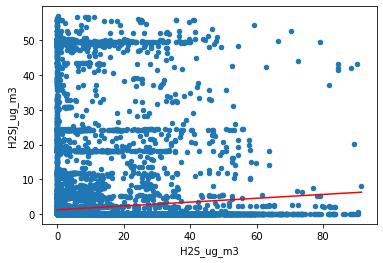

Correlazione tra H2S e H2SJ:
pearson:  0.07594690162434233  spearman:  0.0204889041470487  kendall:  0.017004268012177248


In [112]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3','ATM05_01479')
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

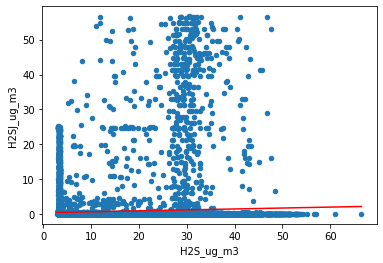

Correlazione tra H2S e H2SJ:
pearson:  0.07424772401108427  spearman:  -0.03060405992865737  kendall:  -0.026024016847352362


In [113]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall = corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM07_01480')
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

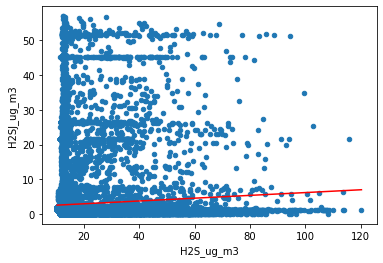

Correlazione tra H2S e H2SJ:
pearson:  0.06808761112626863  spearman:  -0.08060107144896163  kendall:  -0.06303823610701952


In [114]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall = corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM10_01481' )
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

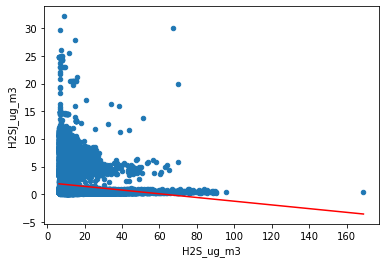

Correlazione tra H2S e H2SJ:
pearson:  -0.11589078570837154  spearman:  -0.05214788209965612  kendall:  -0.03650438839833214


In [115]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM14_01486' )
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 2 TRA I SENSORI VOC E PIDVOC NELLE VARIE POSTAZIONI

In [116]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_SensoriVOC = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'PIDVOC_ppb']]
df_SensoriVOC = df_SensoriVOC.dropna()
df_SensoriVOC

postazione                Data  VOC_ppm      PIDVOC_ppb
0       ATM05_01479 2021-04-12 00:00:00      0.0   44.5999984741
1       ATM05_01479 2021-04-12 00:05:00      0.0   44.0000000000
2       ATM05_01479 2021-04-12 00:10:00      0.0   44.2000007629
3       ATM05_01479 2021-04-12 00:15:00      0.0   44.4000015259
4       ATM05_01479 2021-04-12 00:20:00      0.0   40.7999992371
...             ...                 ...      ...             ...
140193  ATM14_01486 2021-11-28 23:35:00      0.0  352.6000061035
140194  ATM14_01486 2021-11-28 23:40:00      0.0  350.6000061035
140195  ATM14_01486 2021-11-28 23:45:00      0.0  353.0000000000
140196  ATM14_01486 2021-11-28 23:50:00      0.0  352.7999877930
140197  ATM14_01486 2021-11-28 23:55:00      0.0  352.2000122070

[140198 rows x 4 columns]

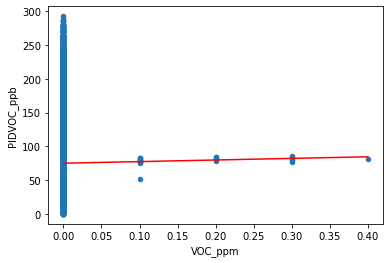

Correlazione tra VOC e PIDVOC:
pearson:  0.002802759904770849  spearman:  0.019924073582987926  kendall:  0.016295258670532917


In [117]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM05_01479' )
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

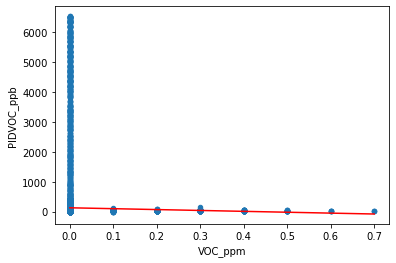

Correlazione tra VOC e PIDVOC:
pearson:  -0.01360985738008193  spearman:  -0.029252430274637562  kendall:  -0.024181541433326993


In [118]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall = corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM07_01480' )
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

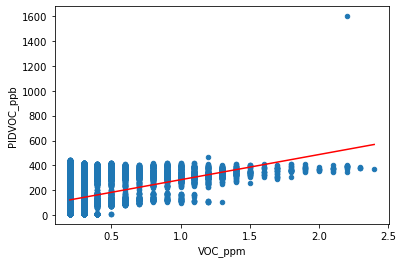

Correlazione tra VOC e PIDVOC:
pearson:  0.34753132766621386  spearman:  0.1950890328734912  kendall:  0.15024096543782872


In [119]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall = corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb' , 'ATM10_01481')
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

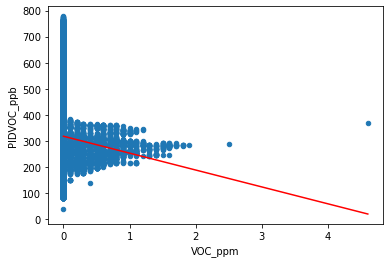

Correlazione tra VOC e PIDVOC:
pearson:  -0.08684644306221975  spearman:  -0.03032925679018794  kendall:  -0.022085782621281337


In [120]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM14_01486' )
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 3 TRA I SENSORI TRS E H2S NELLE VARIE POSTAZIONI

In [121]:
df_SenTRS_H2S = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2S_ug_m3']]
df_SenTRS_H2S = df_SenTRS_H2S.dropna()
df_SenTRS_H2S.fillna(0)

postazione                Data        TRS_ppb     H2S_ug_m3
0       ATM05_01479 2021-04-12 00:00:00   2.0000000000  0.0000000000
1       ATM05_01479 2021-04-12 00:05:00   0.0000000000  0.2000000030
2       ATM05_01479 2021-04-12 00:10:00   0.0000000000  1.7000000477
3       ATM05_01479 2021-04-12 00:15:00  11.8999996185  1.8999999762
4       ATM05_01479 2021-04-12 00:20:00  26.1000003815  2.5000000000
...             ...                 ...            ...           ...
140193  ATM14_01486 2021-11-28 23:35:00   0.0000000000  8.8999996185
140194  ATM14_01486 2021-11-28 23:40:00   0.0000000000  8.3000001907
140195  ATM14_01486 2021-11-28 23:45:00   0.0000000000  8.6999998093
140196  ATM14_01486 2021-11-28 23:50:00   0.0000000000  9.1999998093
140197  ATM14_01486 2021-11-28 23:55:00   0.0000000000  9.1999998093

[140198 rows x 4 columns]

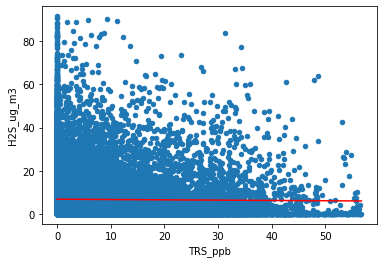

Correlazione tra TRS e H2S:
pearson:  -0.013028664747631756  spearman:  -0.04929222414161009  kendall:  -0.03691687265892058


In [122]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall = corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM05_01479' )
print('Correlazione tra TRS e H2S:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

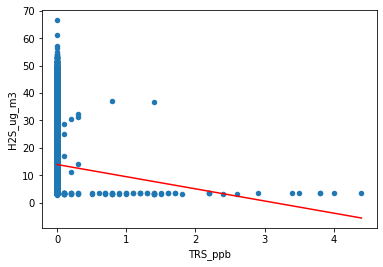

Correlazione tra TRS e H2S:
pearson:  -0.02490068855696131  spearman:  -0.04232862707203519  kendall:  -0.03525903427160265


In [123]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM07_01480' )
print('Correlazione tra TRS e H2S:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

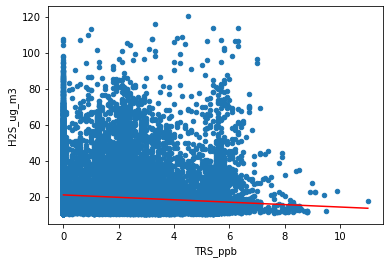

Correlazione tra TRS e H2S:
pearson:  -0.10629043206775543  spearman:  -0.14545394146491405  kendall:  -0.1010588324242256


In [124]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM10_01481' )
print('Correlazione tra TRS e H2S:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

Correlazione tra TRS e H2SJ:
pearson:  -2  spearman:  -2  kendall:  -2


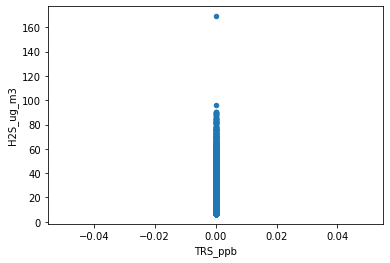

In [125]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM14_01486' )
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 4 TRA I SENSORI TRS E H2SJ NELLE VARIE POSTAZIONI

In [126]:
df_SenTRS_H2SJ = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2SJ_ug_m3']]
df_SenTRS_H2SJ = df_SenTRS_H2SJ.dropna()
df_SenTRS_H2SJ

postazione                Data        TRS_ppb    H2SJ_ug_m3
0       ATM05_01479 2021-04-12 00:00:00   2.0000000000  0.0000000000
1       ATM05_01479 2021-04-12 00:05:00   0.0000000000  0.0000000000
2       ATM05_01479 2021-04-12 00:10:00   0.0000000000  0.0000000000
3       ATM05_01479 2021-04-12 00:15:00  11.8999996185  0.0000000000
4       ATM05_01479 2021-04-12 00:20:00  26.1000003815  0.0000000000
...             ...                 ...            ...           ...
140193  ATM14_01486 2021-11-28 23:35:00   0.0000000000  0.3000000119
140194  ATM14_01486 2021-11-28 23:40:00   0.0000000000  0.3000000119
140195  ATM14_01486 2021-11-28 23:45:00   0.0000000000  0.3000000119
140196  ATM14_01486 2021-11-28 23:50:00   0.0000000000  1.2000000477
140197  ATM14_01486 2021-11-28 23:55:00   0.0000000000  1.1000000238

[140198 rows x 4 columns]

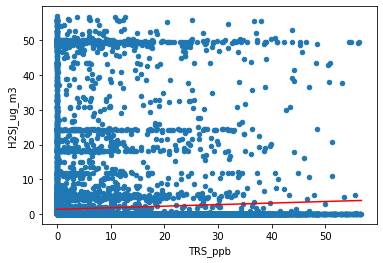

Correlazione tra TRS e H2SJ:
pearson:  0.05612023202544828  spearman:  0.045931019468425364  kendall:  0.04044716538539117


In [127]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM05_01479')
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

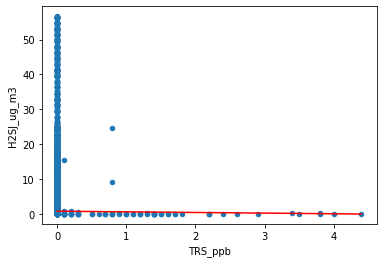

Correlazione tra TRS e H2SJ:
pearson:  -0.0028539806364508706  spearman:  -0.01186432651634976  kendall:  -0.011192462857083581


In [128]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3', 'ATM07_01480' )
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

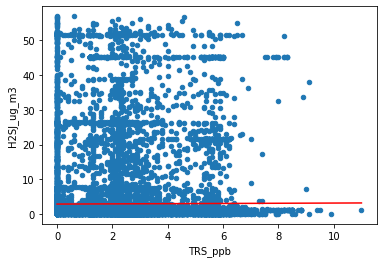

Correlazione tra TRS e H2SJ:
pearson:  0.007706397882671803  spearman:  -0.12178441802055145  kendall:  -0.08469849837461955


In [129]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM10_01481')
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

Correlazione tra TRS e H2SJ:
pearson:  -2  spearman:  -2  kendall:  -2


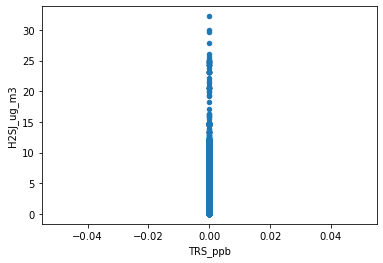

In [130]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM14_01486')
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 5 TRA I SENSORI VOC E C6H6 NELLE VARIE POSTAZIONI

In [131]:
df_SenVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'C6H6_ug_m3']]
df_SenVOC_C6H6 = df_SenVOC_C6H6.dropna()
df_SenVOC_C6H6

postazione                Data  VOC_ppm    C6H6_ug_m3
0       ATM05_01479 2021-04-12 00:00:00      0.0  0.3000000119
1       ATM05_01479 2021-04-12 00:05:00      0.0  0.2000000030
2       ATM05_01479 2021-04-12 00:10:00      0.0  0.2000000030
3       ATM05_01479 2021-04-12 00:15:00      0.0  0.2000000030
4       ATM05_01479 2021-04-12 00:20:00      0.0  0.2000000030
...             ...                 ...      ...           ...
140193  ATM14_01486 2021-11-28 23:35:00      0.0  0.6000000238
140194  ATM14_01486 2021-11-28 23:40:00      0.0  0.6000000238
140195  ATM14_01486 2021-11-28 23:45:00      0.0  0.6000000238
140196  ATM14_01486 2021-11-28 23:50:00      0.0  0.6000000238
140197  ATM14_01486 2021-11-28 23:55:00      0.0  0.6000000238

[140198 rows x 4 columns]

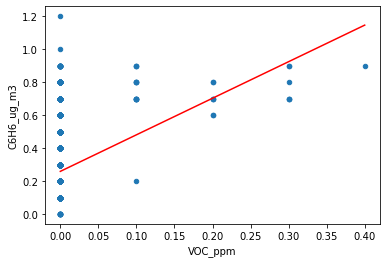

Correlazione tra VOC e C6H6:
pearson:  0.11023743060925593  spearman:  0.04905724751831981  kendall:  0.044700759517772616


In [132]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3' , 'ATM05_01479')
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

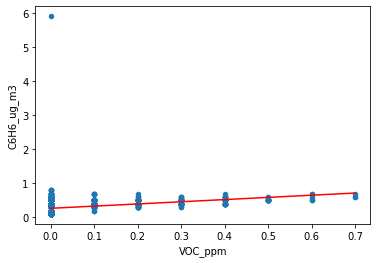

Correlazione tra VOC e C6H6:
pearson:  0.1712151818551854  spearman:  0.14456731322341157  kendall:  0.13663759565021327


In [133]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3', 'ATM07_01480' )
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

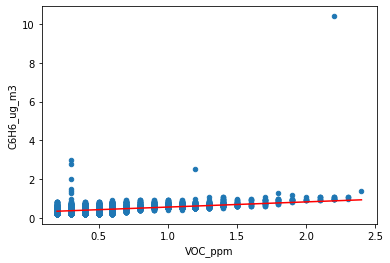

Correlazione tra VOC e C6H6:
pearson:  0.43758613936919916  spearman:  -0.002849972879777744  kendall:  -0.020296237489440958


In [134]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3' , 'ATM10_01481')
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

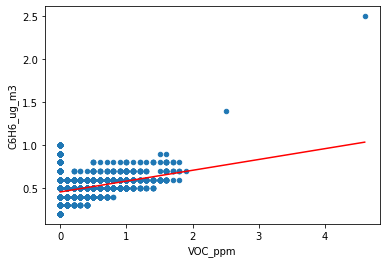

Correlazione tra VOC e C6H6:
pearson:  0.14214224807356757  spearman:  0.1264743339904002  kendall:  0.11413830817009768


In [135]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3', 'ATM14_01486' )
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 6 TRA I SENSORI PIDVOC E C6H6 NELLE VARIE POSTAZIONI

In [136]:
df_SenPIDVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'PIDVOC_ppb', 'C6H6_ug_m3']]
df_SenPIDVOC_C6H6 = df_SenPIDVOC_C6H6.dropna()
df_SenPIDVOC_C6H6

postazione                Data      PIDVOC_ppb    C6H6_ug_m3
0       ATM05_01479 2021-04-12 00:00:00   44.5999984741  0.3000000119
1       ATM05_01479 2021-04-12 00:05:00   44.0000000000  0.2000000030
2       ATM05_01479 2021-04-12 00:10:00   44.2000007629  0.2000000030
3       ATM05_01479 2021-04-12 00:15:00   44.4000015259  0.2000000030
4       ATM05_01479 2021-04-12 00:20:00   40.7999992371  0.2000000030
...             ...                 ...             ...           ...
140193  ATM14_01486 2021-11-28 23:35:00  352.6000061035  0.6000000238
140194  ATM14_01486 2021-11-28 23:40:00  350.6000061035  0.6000000238
140195  ATM14_01486 2021-11-28 23:45:00  353.0000000000  0.6000000238
140196  ATM14_01486 2021-11-28 23:50:00  352.7999877930  0.6000000238
140197  ATM14_01486 2021-11-28 23:55:00  352.2000122070  0.6000000238

[140198 rows x 4 columns]

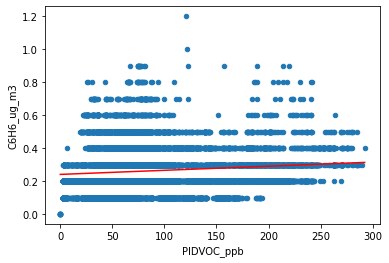

Correlazione tra PIDVOC e C6H6:
pearson:  0.10441473692213753  spearman:  0.17363200281853491  kendall:  0.1286681617862913


In [137]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM05_01479' )
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

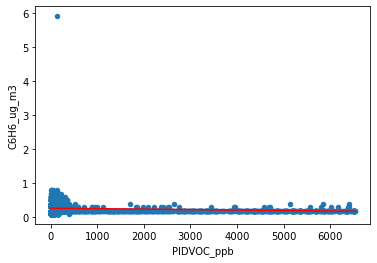

Correlazione tra PIDVOC e C6H6:
pearson:  -0.07893927831700971  spearman:  -0.01111394593546374  kendall:  -0.009224325474772282


In [138]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3' , 'ATM07_01480')
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

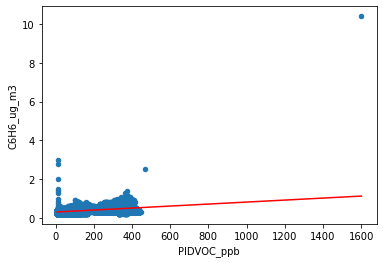

Correlazione tra PIDVOC e C6H6:
pearson:  0.4919979185721272  spearman:  0.5357929673911618  kendall:  0.41016931736451295


In [139]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM10_01481' )
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

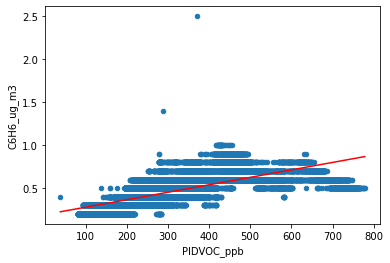

Correlazione tra PIDVOC e C6H6:
pearson:  0.7322690887945411  spearman:  0.8468934054603997  kendall:  0.6782050059386131


In [140]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM14_01486' )
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 7 

# POSTAZIONI ATM05_01479 E ATM07_01480 

In [141]:
def creazione_df(df, colonna1, colonna2, composto, df2 = None):
    df_1 = df[df.postazione == colonna1].dropna()[composto].reset_index(drop = True).to_frame()
    if df2 is None:
        df_2 = df.copy()
        df_2 = df_2[df_2.postazione == colonna2].dropna()[composto].reset_index(drop = True).to_frame()
    else:
        df_2 = df2.copy()
        df_2 = df_2[colonna2].dropna().reset_index(drop = True).to_frame()
    df_Full = pd.concat([df_1, df_2], axis=1)
    df_Full.columns = [colonna1,colonna2]
    df_Full = df_Full[[colonna1,colonna2]].fillna(0)
    return df_Full

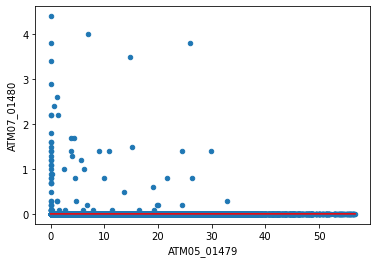

pearson:  0.0019693769854864382  spearman:  0.010624987235302436  kendall:  0.009578657289836498


In [142]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'TRS_ppb' ),
                                         'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

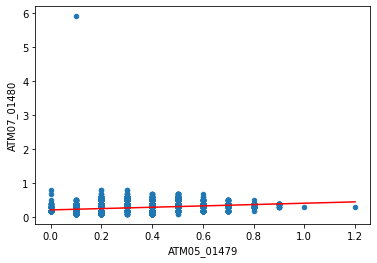

pearson:  0.2702535009656438  spearman:  0.3066729395057551  kendall:  0.26411532641454416


In [143]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'C6H6_ug_m3' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

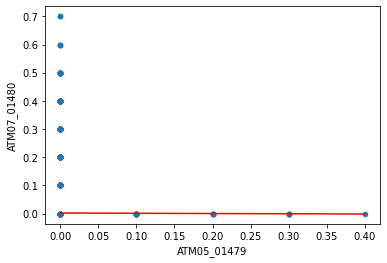

pearson:  -0.0019860101387426457  spearman:  -0.002610647166544233  kendall:  -0.0026061770745514704


In [144]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'VOC_ppm' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

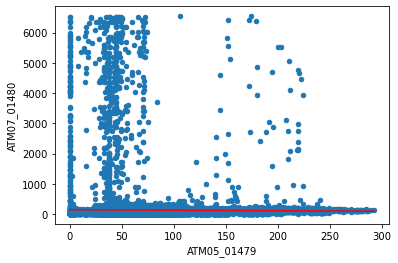

pearson:  -0.016458090259726284  spearman:  0.2871571404036802  kendall:  0.1939798390732714


In [145]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'PIDVOC_ppb' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

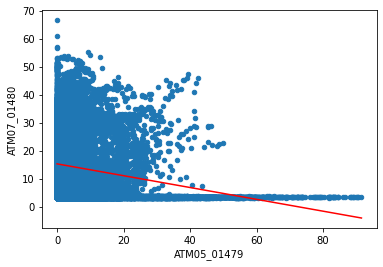

pearson:  -0.16812214243009135  spearman:  -0.027934172284850563  kendall:  -0.015671682006962156


In [146]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'H2S_ug_m3' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

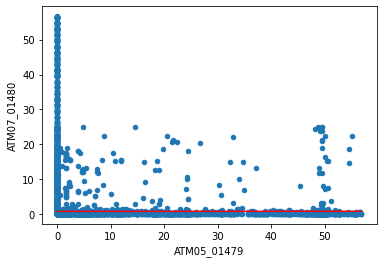

pearson:  0.0011596647376451259  spearman:  0.0419295957785468  kendall:  0.03878237092008834


In [147]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'H2SJ_ug_m3' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM05_01479 E ATM10_01481

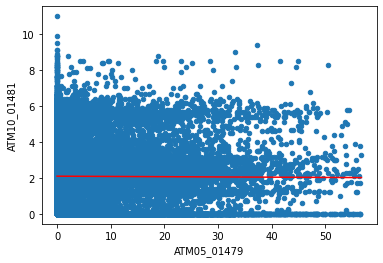

pearson:  -0.006713991464431564  spearman:  -0.007140554653378073  kendall:  -0.005440671343958184


In [148]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'TRS_ppb' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

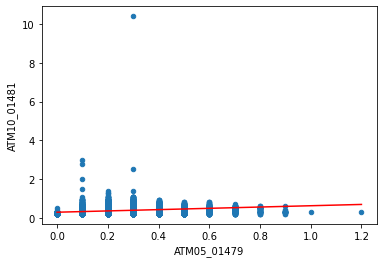

pearson:  0.30818650443514034  spearman:  0.4204111446451089  kendall:  0.3570095592778434


In [149]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'C6H6_ug_m3' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

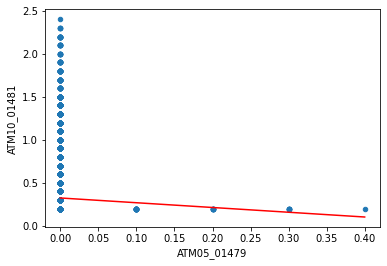

pearson:  -0.01442931220095171  spearman:  -0.028807546249847292  kendall:  -0.026765343231810727


In [150]:
# correlazione per il sensore VOC_pp
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'VOC_ppm' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

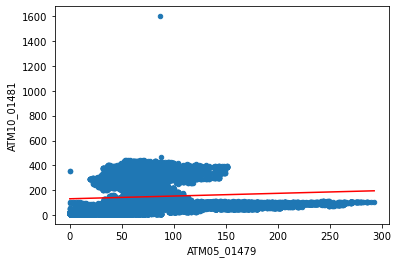

pearson:  0.08582794340001529  spearman:  0.37579241358009974  kendall:  0.25378033404777606


In [151]:
# correlazione per il sensore PIDVOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'PIDVOC_ppb' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

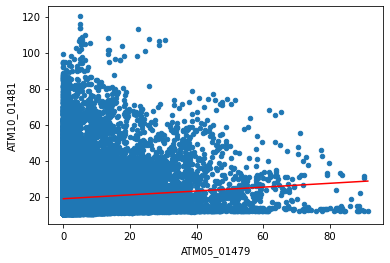

pearson:  0.08989510612843217  spearman:  0.08729004872131492  kendall:  0.060245174385144824


In [152]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'H2S_ug_m3' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

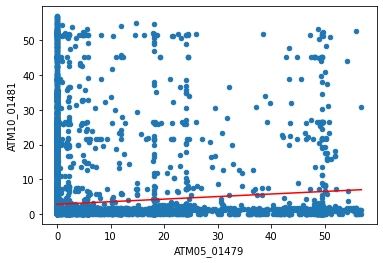

pearson:  0.07561612644123294  spearman:  -0.04832874472713796  kendall:  -0.04072227520665034


In [153]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'H2SJ_ug_m3' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM05_01479 E ATM14_01486

pearson:  -2  spearman:  -2  kendall:  -2


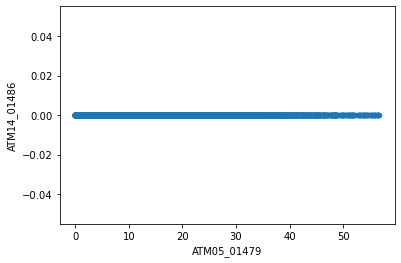

In [154]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'TRS_ppb' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

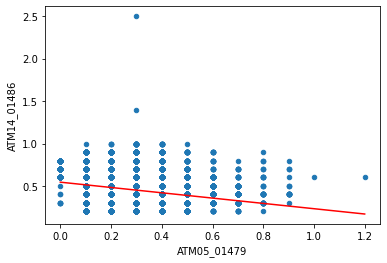

pearson:  -0.20973371888395792  spearman:  -0.2319126876862684  kendall:  -0.1714419673604478


In [155]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'C6H6_ug_m3' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

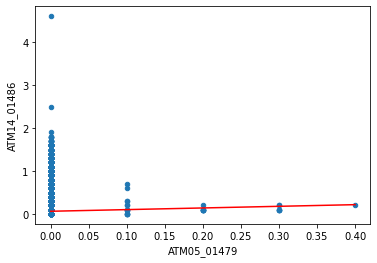

pearson:  -0.20973371888395792  spearman:  0.05423022320176513  kendall:  0.05262612892717142


In [156]:
# correlazione per il sensore VOC_ppm
pearsonPost4, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'VOC_ppm' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

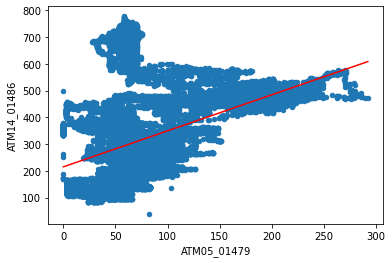

pearson:  0.4372041923680496  spearman:  0.4528505567968551  kendall:  0.33100716785911527


In [157]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'PIDVOC_ppb' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

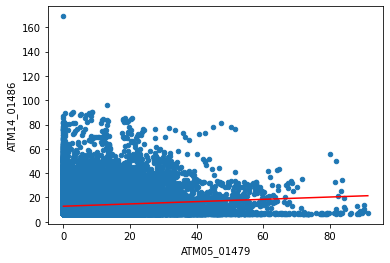

pearson:  0.10000629133736465  spearman:  0.06365495269736106  kendall:  0.046049932275268


In [158]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'H2S_ug_m3' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

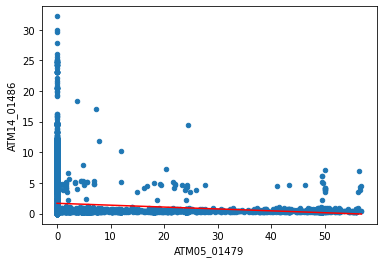

pearson:  -0.08160863395526256  spearman:  0.0008157753788005841  kendall:  0.0006119329520365702


In [159]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'H2SJ_ug_m3' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM07_01480 E ATM10_01481

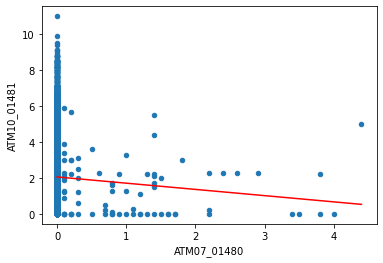

pearson:  -0.012925241210450421  spearman:  -0.015064797681522376  kendall:  -0.012800194899181518


In [160]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'TRS_ppb' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

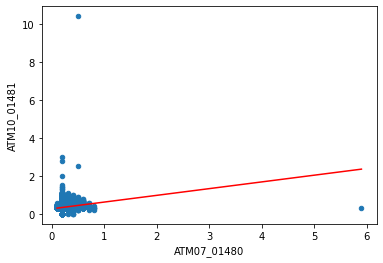

pearson:  0.22997416196767903  spearman:  0.2867455513951409  kendall:  0.24981170158820035


In [161]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'C6H6_ug_m3' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

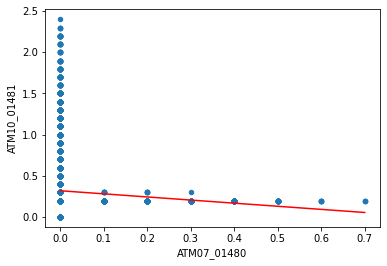

pearson:  -0.04207077692817347  spearman:  -0.08510399346520024  kendall:  -0.07861779880052644


In [162]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'VOC_ppm' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

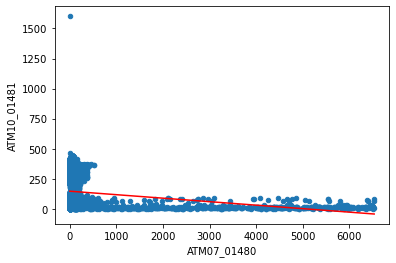

pearson:  -0.12192281502567281  spearman:  -0.09631069116381695  kendall:  -0.06853142390067325


In [163]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'PIDVOC_ppb' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

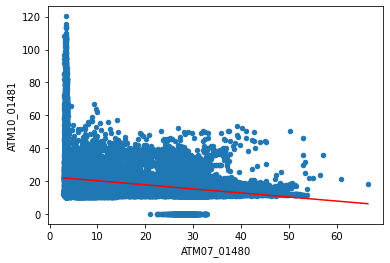

pearson:  -0.2553909089805169  spearman:  -0.18733021591162208  kendall:  -0.12896081742139062


In [164]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'H2S_ug_m3' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

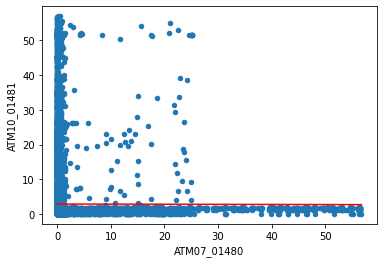

pearson:  -0.001950724683530852  spearman:  -0.02455027766630365  kendall:  -0.01937500935404489


In [165]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'H2SJ_ug_m3' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM07_01480 E ATM14_01486

pearson:  -2  spearman:  -2  kendall:  -2


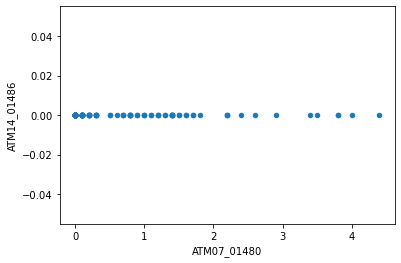

In [166]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'TRS_ppb' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

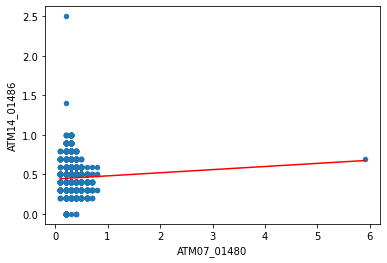

pearson:  0.01880570677921127  spearman:  0.03322409306172042  kendall:  0.026489622419144265


In [167]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'C6H6_ug_m3' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

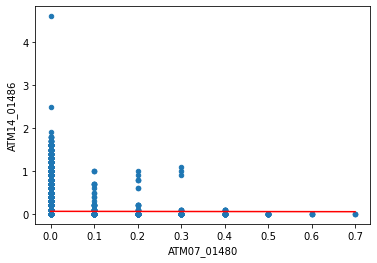

pearson:  -0.0014639212432645406  spearman:  0.02710634070739287  kendall:  0.026279564243047664


In [168]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'VOC_ppm' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

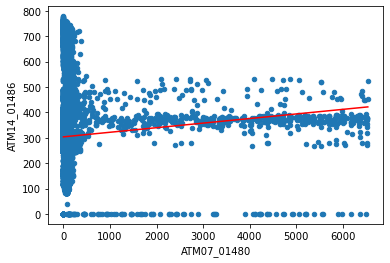

pearson:  0.06102233921290272  spearman:  0.24286269347962888  kendall:  0.139278502484854


In [169]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'PIDVOC_ppb' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

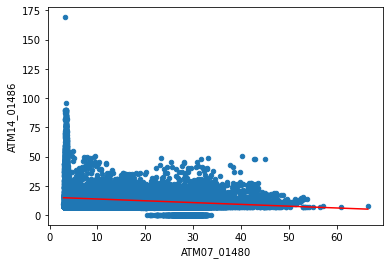

pearson:  -0.2003229222513408  spearman:  -0.10724199404508343  kendall:  -0.07059121271253144


In [170]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'H2S_ug_m3' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

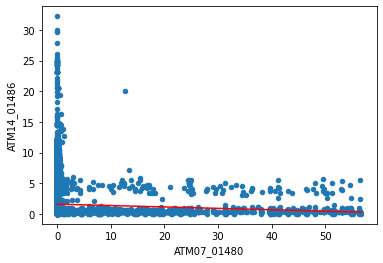

pearson:  -0.038224361425194836  spearman:  0.026138224117459894  kendall:  0.021859101688383942


In [171]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'H2SJ_ug_m3' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM10_01481 E ATM14_01486

pearson:  -2  spearman:  -2  kendall:  -2


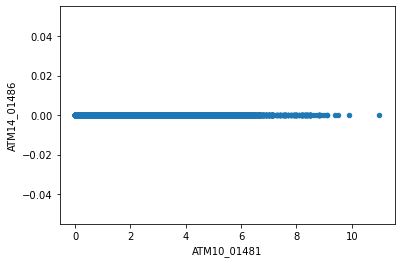

In [172]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'TRS_ppb' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

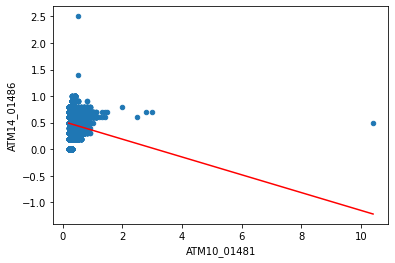

pearson:  -0.12076757467505723  spearman:  -0.22079975569668897  kendall:  -0.1504234260596956


In [173]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'C6H6_ug_m3' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

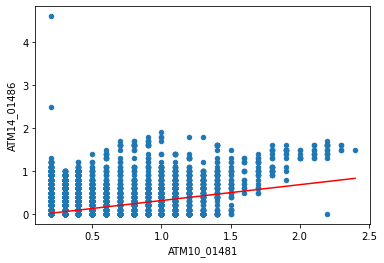

pearson:  0.39565370923447024  spearman:  0.16853915249654042  kendall:  0.1524475272463502


In [174]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'VOC_ppm' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

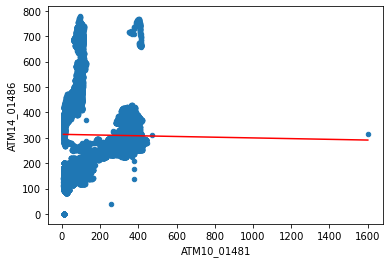

pearson:  -0.011582528422829455  spearman:  0.1464517301164673  kendall:  0.17147919443663706


In [175]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'PIDVOC_ppb' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

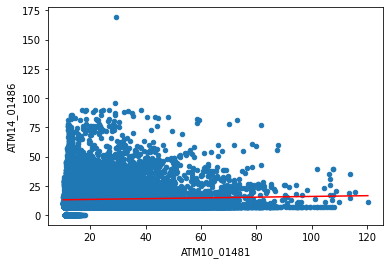

pearson:  0.03993108158081625  spearman:  0.04800245079343487  kendall:  0.03570668973121544


In [176]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'H2S_ug_m3' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

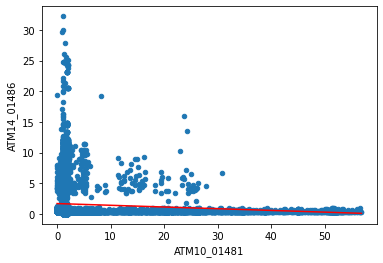

pearson:  -0.07202562449590093  spearman:  0.056803503769137426  kendall:  0.0409788601472886


In [177]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'H2SJ_ug_m3' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# CORRELAZIONE 8

In [178]:
df_DatiMeteo = pd.read_excel('Dati_Meteo.xlsx')

<AxesSubplot:>

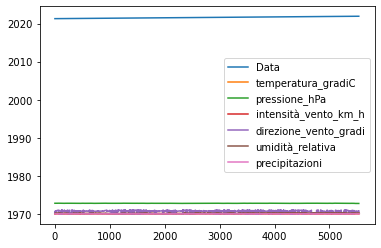

In [179]:
df_DatiMeteo.plot()

In [180]:
# crea un dataframe composto dalla media oraria dei sensori in base alla stazione scelta
def media_Stazione(df, postazione):
    df1 = df[df.postazione == postazione]
    df2 = pd.concat([media_oraria(df1, 'C6H6_ug_m3')['C6H6_ug_m3'],
                      media_oraria(df1, 'H2S_ug_m3')['H2S_ug_m3'],
                      media_oraria(df1, 'H2SJ_ug_m3')['H2SJ_ug_m3'],
                      media_oraria(df1, 'VOC_ppm')['VOC_ppm'], 
                      media_oraria(df1, 'PIDVOC_ppb')['PIDVOC_ppb']], axis=1)
    if postazione == 'ATM14_01486':
        df2['TRS_ppb'] = 0
    else:
        df2['TRS_ppb'] = media_oraria(df1, 'TRS_ppb')['TRS_ppb']
    return df2

In [181]:
stazione = ['ATM05_01479','ATM07_01480','ATM10_01481', 'ATM14_01486']
sensore = ['TRS_ppb','C6H6_ug_m3', 'VOC_ppm', 'PIDVOC_ppb', 'H2S_ug_m3', 'H2SJ_ug_m3']
meteo = ['temperatura_gradiC', 'direzione_vento_gradi','pressione_hPa', 'intensità_vento_km_h',
         'umidità_relativa', 'precipitazioni']

In [182]:
# correlazione con la temperatura per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

C6H6_ug_m3     H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                   
2021-04-12 00:00:00  0.2083333371  1.1499999888         0.0      0.0   
2021-04-12 01:00:00  0.2000000030  0.0000000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030  0.1000000015         0.0      0.0   
2021-04-12 03:00:00  0.2583333415  1.1999999891         0.0      0.0   
2021-04-12 04:00:00  0.2166666711  0.9999999795         0.0      0.0   
...                           ...           ...         ...      ...   
2021-11-28 19:00:00  0.1000000015  2.2333333244         0.0      0.0   
2021-11-28 20:00:00  0.1000000015  0.7166666569         0.0      0.0   
2021-11-28 21:00:00  0.1000000015  0.9249999921         0.0      0.0   
2021-11-28 22:00:00  0.1000000015  2.5749999781         0.0      0.0   
2021-11-28 23:00:00  0.1000000015  2.7250000040         0.0      0.0   

                        PIDVOC_ppb        TRS_ppb   postazione  
Data                                                            
2021-04-12 00:00:00  43.5833330154  13.8285712174  ATM05_01479  
2021-04-12 01:00:00  44.1799999237   5.5428570168  ATM05_01479  
2021-04-12 02:00:00  38.0500005086  19.4333333174  ATM05_01479  
2021-04-12 03:00:00  41.4166666667  10.1222219707  ATM05_01479  
2021-04-12 04:00:00  44.5999994278  19.8374994695  ATM05_01479  
...                            ...            ...          ...  
2021-11-28 19:00:00  30.8999996185   3.9399999976  ATM05_01479  
2021-11-28 20:00:00  23.1666666667  10.6999998093  ATM05_01479  
2021-11-28 21:00:00  16.8833336035  17.0500001907  ATM05_01479  
2021-11-28 22:00:00  15.8666667938  10.5999997854  ATM05_01479  
2021-11-28 23:00:00  15.6500002543   0.0000000000  ATM05_01479  

[2979 rows x 7 columns]

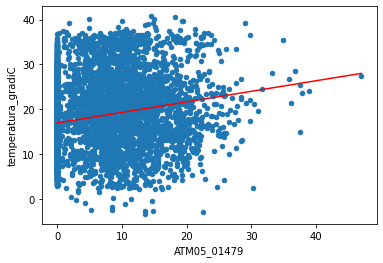

pearson:  0.20599272787998363  spearman:  0.23545958170258044  kendall:  0.1677665292836867


In [183]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

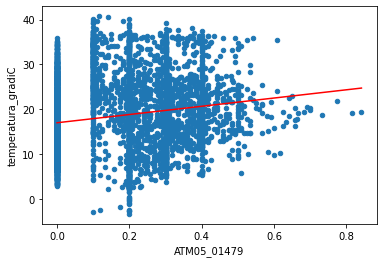

pearson:  0.17644933109768943  spearman:  0.20507249186052617  kendall:  0.1454341800943782


In [184]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

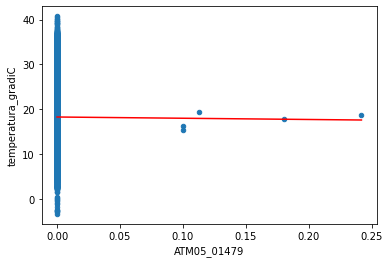

pearson:  -0.0016483068266639458  spearman:  0.0004823996407700026  kendall:  0.00039954935807510783


In [185]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

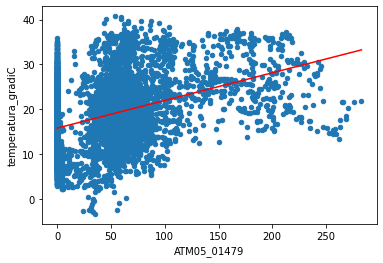

pearson:  0.3985182725162789  spearman:  0.36685427979562385  kendall:  0.25800356051004514


In [186]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

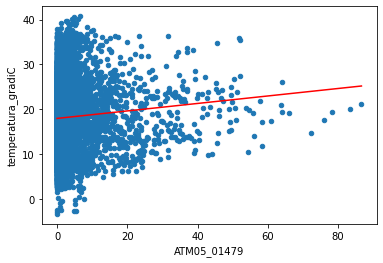

pearson:  0.0834694457811123  spearman:  0.19395398038196626  kendall:  0.13803383104248595


In [187]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

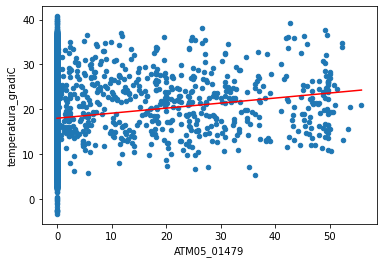

pearson:  0.1216105299454163  spearman:  0.16437015908303915  kendall:  0.13036612793393842


In [188]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

In [189]:
# correlazione con la temperatura per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7

C6H6_ug_m3      H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                    
2021-04-12 00:00:00  0.2416666734   4.0749999881         0.0      0.0   
2021-04-12 01:00:00  0.2000000030   3.8500000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030   3.7666666706         0.0      0.0   
2021-04-12 03:00:00  0.2000000030   4.2250000040         0.0      0.0   
2021-04-12 04:00:00  0.2000000030   4.0916666587         0.0      0.0   
...                           ...            ...         ...      ...   
2021-11-28 19:00:00  0.2000000030  28.1833332380         0.0      0.0   
2021-11-28 20:00:00  0.2000000030  25.9583333333         0.0      0.0   
2021-11-28 21:00:00  0.2000000030  26.7833334605         0.0      0.0   
2021-11-28 22:00:00  0.2000000030  27.5416668256         0.0      0.0   
2021-11-28 23:00:00  0.2000000030  28.7250002225         0.0      0.0   

                        PIDVOC_ppb  TRS_ppb   postazione  
Data                                                      
2021-04-12 00:00:00  21.9333333969      0.0  ATM07_01480  
2021-04-12 01:00:00  17.3600000381      0.0  ATM07_01480  
2021-04-12 02:00:00  14.1499998967      0.0  ATM07_01480  
2021-04-12 03:00:00  21.5833331744      0.0  ATM07_01480  
2021-04-12 04:00:00  22.8666667938      0.0  ATM07_01480  
...                            ...      ...          ...  
2021-11-28 19:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 20:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 21:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 22:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 23:00:00   0.0000000000      0.0  ATM07_01480  

[3075 rows x 7 columns]

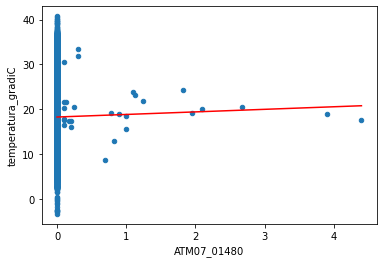

pearson:  0.007632350224419055  spearman:  0.02323844665109649  kendall:  0.01896431636470792


In [190]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

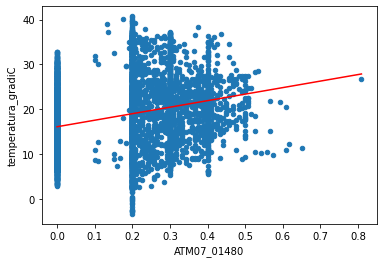

pearson:  0.26946172066403806  spearman:  0.2773202076287034  kendall:  0.19365660514998517


In [191]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

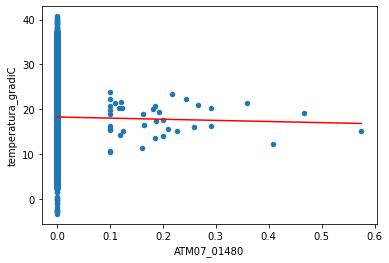

pearson:  -0.00580690482617811  spearman:  0.0014238296991500297  kendall:  0.0011528942611008655


In [192]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

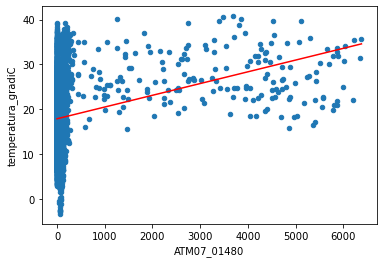

pearson:  0.22083096736024016  spearman:  0.2702033237739472  kendall:  0.19526718523101771


In [193]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

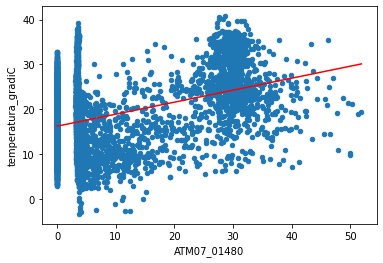

pearson:  0.3874636678457819  spearman:  0.3083447985998752  kendall:  0.22123423070807782


In [194]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

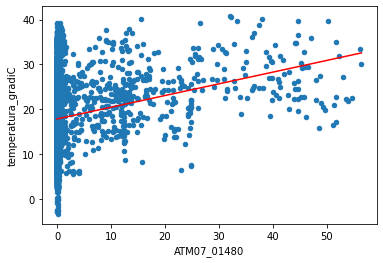

pearson:  0.21248022975496159  spearman:  0.31278260656096024  kendall:  0.23271494780439805


In [195]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [196]:
# correlazione con la temperatura per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3       VOC_ppm  \
Data                                                                           
2021-04-12 00:00:00  0.4166666716  26.1583334605  1.6333333651  0.2000000030   
2021-04-12 01:00:00  0.4000000060  25.9777776930  1.7000000477  0.2000000030   
2021-04-12 02:00:00  0.4000000060  26.0444446140  1.6777778202  0.2000000030   
2021-04-12 03:00:00  0.4700000018  27.4800001144  1.6000000238  0.2000000030   
2021-04-12 04:00:00  0.4000000060  26.3624999523  1.6125000268  0.2000000030   
...                           ...            ...           ...           ...   
2021-11-28 19:00:00  0.2000000030  13.5666666826  1.1750000219  0.2000000030   
2021-11-28 20:00:00  0.2000000030  11.7583332856  1.8749999702  0.2416666734   
2021-11-28 21:00:00  0.2000000030  11.7166666190  1.8499999642  0.2166666711   
2021-11-28 22:00:00  0.2000000030  12.3750000000  1.8749999702  0.2333333393   
2021-11-28 23:00:00  0.2000000030  12.9916667144  1.8833333055  0.2583333415   

                        PIDVOC_ppb       TRS_ppb   postazione  
Data                                                           
2021-04-12 00:00:00  80.9499994914  2.3500000238  ATM10_01481  
2021-04-12 01:00:00  87.5777782864  1.1333333353  ATM10_01481  
2021-04-12 02:00:00  88.6000001695  1.1666666791  ATM10_01481  
2021-04-12 03:00:00  84.5000000000  1.1833333497  ATM10_01481  
2021-04-12 04:00:00  87.8249998093  2.0125000067  ATM10_01481  
...                            ...           ...          ...  
2021-11-28 19:00:00  10.2999998728  1.9916666845  ATM10_01481  
2021-11-28 20:00:00  10.5666668415  2.6454544934  ATM10_01481  
2021-11-28 21:00:00  10.4499998093  2.1100000083  ATM10_01481  
2021-11-28 22:00:00  10.4499998887  0.5666666639  ATM10_01481  
2021-11-28 23:00:00  10.1166665554  2.1999999682  ATM10_01481  

[3051 rows x 7 columns]

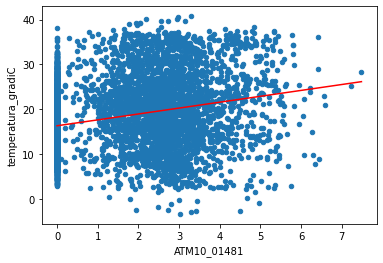

pearson:  0.26213191665315977  spearman:  0.25937094735998145  kendall:  0.18658244517975947


In [197]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

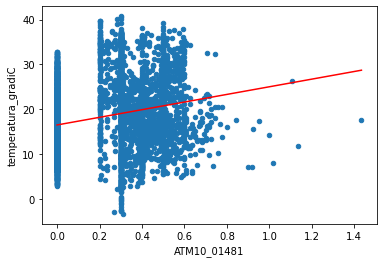

pearson:  0.22224279900220428  spearman:  0.21051674314428262  kendall:  0.15111387044432797


In [198]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

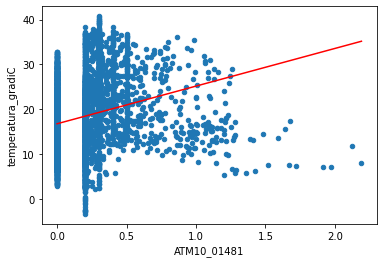

pearson:  0.2392860633261131  spearman:  0.3742738819600664  kendall:  0.26885919789143325


In [199]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

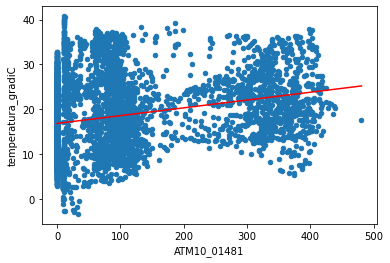

pearson:  0.26354260732879076  spearman:  0.312129262982617  kendall:  0.21145676387465695


In [200]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

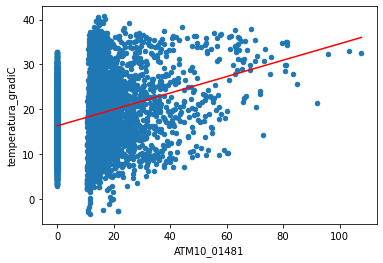

pearson:  0.2981567155315529  spearman:  0.30040174868565206  kendall:  0.21386705635091532


In [201]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

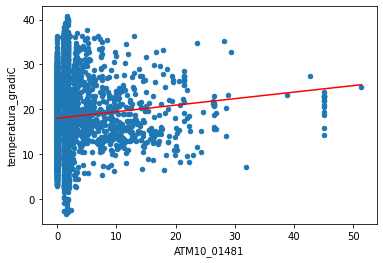

pearson:  0.07801806557498343  spearman:  0.20740278966266693  kendall:  0.14592119711526685


In [202]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [203]:
# correlazione con la temperatura per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3]).fillna(0)
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14


C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3  VOC_ppm  \
Data                                                                      
2021-04-12 00:00:00  0.2333333393  16.5666669210  5.1916667223      0.0   
2021-04-12 01:00:00  0.2000000030  15.6899998665  7.4600000858      0.0   
2021-04-12 02:00:00  0.2000000030  15.6833332380  6.9999998808      0.0   
2021-04-12 03:00:00  0.2000000030  17.6916666031  7.6416666508      0.0   
2021-04-12 04:00:00  0.2000000030  16.9083333810  6.0000000795      0.0   
...                           ...            ...           ...      ...   
2021-11-28 19:00:00  0.6999999881   9.5416667461  0.3000000119      0.0   
2021-11-28 20:00:00  0.6999999881   7.6333333651  0.3000000119      0.0   
2021-11-28 21:00:00  0.6999999881   7.5999999444  0.3000000119      0.0   
2021-11-28 22:00:00  0.6833333274   9.7999999126  0.3000000119      0.0   
2021-11-28 23:00:00  0.6500000060   9.3249999682  0.4416666826      0.0   

                         PIDVOC_ppb  TRS_ppb   postazione  
Data                                                       
2021-04-12 00:00:00  154.7166646322        0  ATM14_01486  
2021-04-12 01:00:00  147.2399993896        0  ATM14_01486  
2021-04-12 02:00:00  147.4499994914        0  ATM14_01486  
2021-04-12 03:00:00  151.2500012716        0  ATM14_01486  
2021-04-12 04:00:00  149.5666681925        0  ATM14_01486  
...                             ...      ...          ...  
2021-11-28 19:00:00  355.3000005086        0  ATM14_01486  
2021-11-28 20:00:00  358.7499974569        0  ATM14_01486  
2021-11-28 21:00:00  356.5666631063        0  ATM14_01486  
2021-11-28 22:00:00  349.5666631063        0  ATM14_01486  
2021-11-28 23:00:00  353.0000000000        0  ATM14_01486  

[3064 rows x 7 columns]

pearson:  -2  spearman:  -2  kendall:  -2


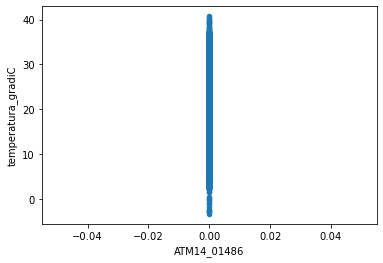

In [204]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

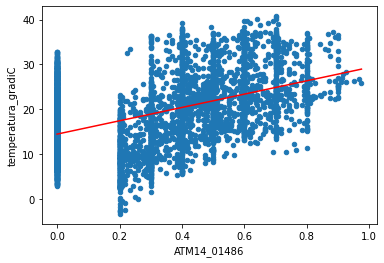

pearson:  0.49674327332195795  spearman:  0.47497887646245607  kendall:  0.3394665657655972


In [205]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

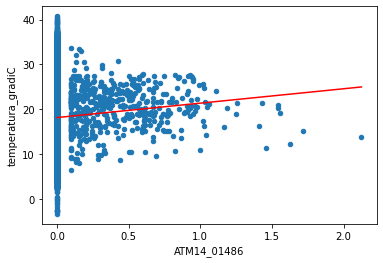

pearson:  0.06195203479504629  spearman:  0.11463310126291354  kendall:  0.09151921868123275


In [206]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

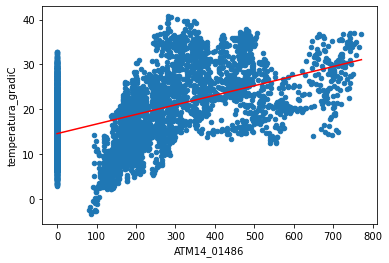

pearson:  0.5163111000801117  spearman:  0.4946789818104716  kendall:  0.3536144947063098


In [207]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

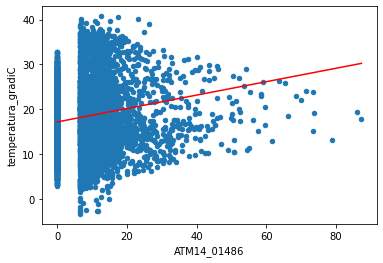

pearson:  0.17826692024697258  spearman:  0.2555951914613506  kendall:  0.1839966834701586


In [208]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall) 

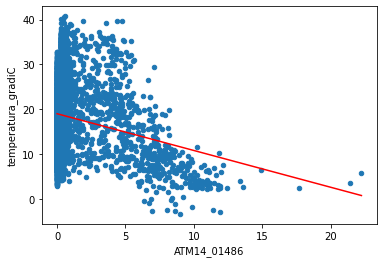

pearson:  -0.21211207500126034  spearman:  0.1605680715846155  kendall:  0.12015614748438877


In [209]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

# CORRELAZIONE 9

In [210]:
# correlazione con la direzione del vento per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

C6H6_ug_m3     H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                   
2021-04-12 00:00:00  0.2083333371  1.1499999888         0.0      0.0   
2021-04-12 01:00:00  0.2000000030  0.0000000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030  0.1000000015         0.0      0.0   
2021-04-12 03:00:00  0.2583333415  1.1999999891         0.0      0.0   
2021-04-12 04:00:00  0.2166666711  0.9999999795         0.0      0.0   
...                           ...           ...         ...      ...   
2021-11-28 19:00:00  0.1000000015  2.2333333244         0.0      0.0   
2021-11-28 20:00:00  0.1000000015  0.7166666569         0.0      0.0   
2021-11-28 21:00:00  0.1000000015  0.9249999921         0.0      0.0   
2021-11-28 22:00:00  0.1000000015  2.5749999781         0.0      0.0   
2021-11-28 23:00:00  0.1000000015  2.7250000040         0.0      0.0   

                        PIDVOC_ppb        TRS_ppb   postazione  
Data                                                            
2021-04-12 00:00:00  43.5833330154  13.8285712174  ATM05_01479  
2021-04-12 01:00:00  44.1799999237   5.5428570168  ATM05_01479  
2021-04-12 02:00:00  38.0500005086  19.4333333174  ATM05_01479  
2021-04-12 03:00:00  41.4166666667  10.1222219707  ATM05_01479  
2021-04-12 04:00:00  44.5999994278  19.8374994695  ATM05_01479  
...                            ...            ...          ...  
2021-11-28 19:00:00  30.8999996185   3.9399999976  ATM05_01479  
2021-11-28 20:00:00  23.1666666667  10.6999998093  ATM05_01479  
2021-11-28 21:00:00  16.8833336035  17.0500001907  ATM05_01479  
2021-11-28 22:00:00  15.8666667938  10.5999997854  ATM05_01479  
2021-11-28 23:00:00  15.6500002543   0.0000000000  ATM05_01479  

[2979 rows x 7 columns]

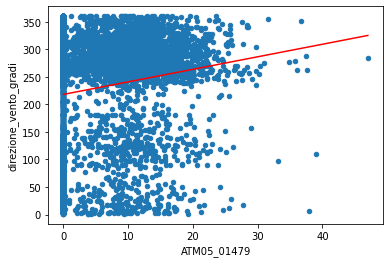

pearson:  0.15660289288228935  spearman:  0.13974148695600544  kendall:  0.09949223495218329


In [211]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

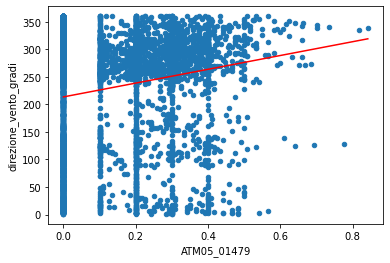

pearson:  0.1893635256554733  spearman:  0.1744051252405178  kendall:  0.13075290942104045


In [212]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

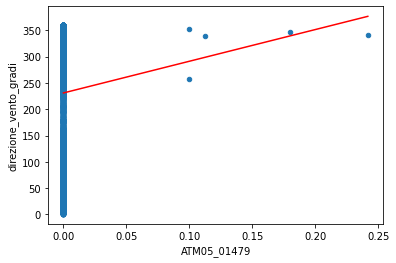

pearson:  0.028201975660211775  spearman:  0.03536844685956585  kendall:  0.028893621281278585


In [213]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

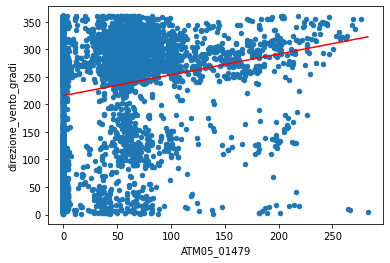

pearson:  0.191907898065922  spearman:  0.17920741478394966  kendall:  0.12938183353032007


In [214]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

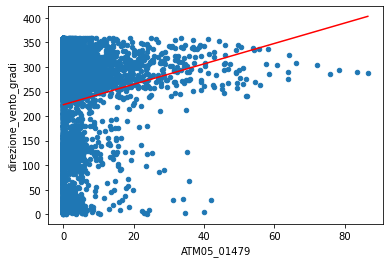

pearson:  0.16323641998494545  spearman:  0.1687061500062852  kendall:  0.12516971634951798


In [215]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

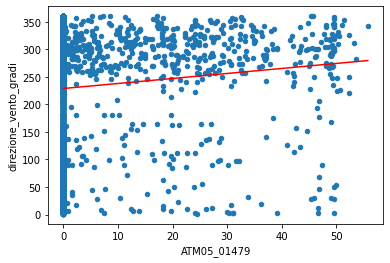

pearson:  0.0773295331138286  spearman:  0.11296175539175082  kendall:  0.08999917471272545


In [216]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [217]:
# correlazione con la direzione del vento per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7


C6H6_ug_m3      H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                    
2021-04-12 00:00:00  0.2416666734   4.0749999881         0.0      0.0   
2021-04-12 01:00:00  0.2000000030   3.8500000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030   3.7666666706         0.0      0.0   
2021-04-12 03:00:00  0.2000000030   4.2250000040         0.0      0.0   
2021-04-12 04:00:00  0.2000000030   4.0916666587         0.0      0.0   
...                           ...            ...         ...      ...   
2021-11-28 19:00:00  0.2000000030  28.1833332380         0.0      0.0   
2021-11-28 20:00:00  0.2000000030  25.9583333333         0.0      0.0   
2021-11-28 21:00:00  0.2000000030  26.7833334605         0.0      0.0   
2021-11-28 22:00:00  0.2000000030  27.5416668256         0.0      0.0   
2021-11-28 23:00:00  0.2000000030  28.7250002225         0.0      0.0   

                        PIDVOC_ppb  TRS_ppb   postazione  
Data                                                      
2021-04-12 00:00:00  21.9333333969      0.0  ATM07_01480  
2021-04-12 01:00:00  17.3600000381      0.0  ATM07_01480  
2021-04-12 02:00:00  14.1499998967      0.0  ATM07_01480  
2021-04-12 03:00:00  21.5833331744      0.0  ATM07_01480  
2021-04-12 04:00:00  22.8666667938      0.0  ATM07_01480  
...                            ...      ...          ...  
2021-11-28 19:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 20:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 21:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 22:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 23:00:00   0.0000000000      0.0  ATM07_01480  

[3075 rows x 7 columns]

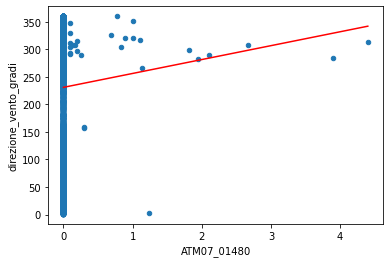

pearson:  0.02650577099700917  spearman:  0.04928299243623592  kendall:  0.04021369866664271


In [218]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

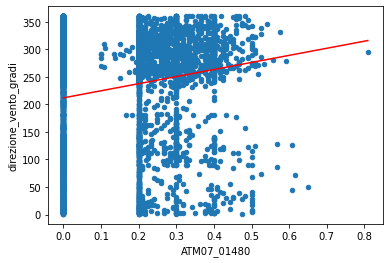

pearson:  0.18738247513252373  spearman:  0.1725086133566256  kendall:  0.1305289021609818


In [219]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

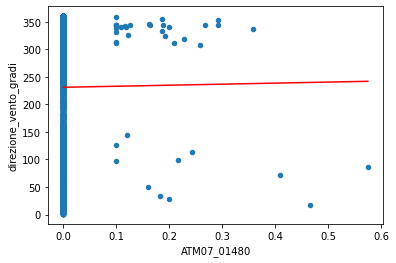

pearson:  0.0034399993617970147  spearman:  0.05238111701642142  kendall:  0.0427552807187979


In [220]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

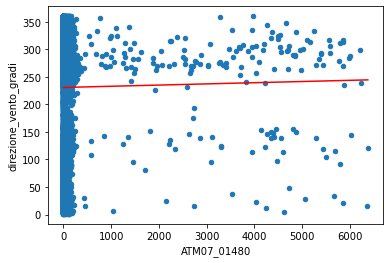

pearson:  0.01431129419642365  spearman:  0.1369552351187062  kendall:  0.09902192512803752


In [221]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

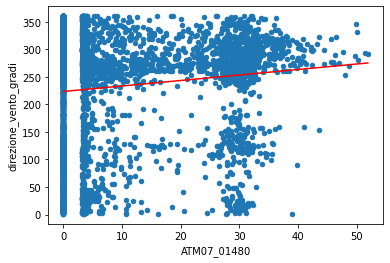

pearson:  0.11360502697164611  spearman:  0.12143619264473675  kendall:  0.08352271557047415


In [222]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

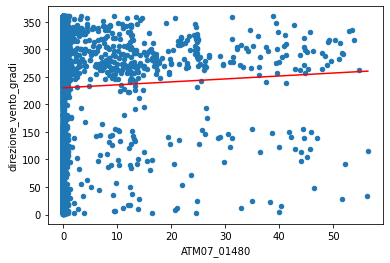

pearson:  0.034246364745842604  spearman:  0.1276635043363035  kendall:  0.09680530943574331


In [223]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [224]:
# correlazione con la direzione del vento per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10


C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3       VOC_ppm  \
Data                                                                           
2021-04-12 00:00:00  0.4166666716  26.1583334605  1.6333333651  0.2000000030   
2021-04-12 01:00:00  0.4000000060  25.9777776930  1.7000000477  0.2000000030   
2021-04-12 02:00:00  0.4000000060  26.0444446140  1.6777778202  0.2000000030   
2021-04-12 03:00:00  0.4700000018  27.4800001144  1.6000000238  0.2000000030   
2021-04-12 04:00:00  0.4000000060  26.3624999523  1.6125000268  0.2000000030   
...                           ...            ...           ...           ...   
2021-11-28 19:00:00  0.2000000030  13.5666666826  1.1750000219  0.2000000030   
2021-11-28 20:00:00  0.2000000030  11.7583332856  1.8749999702  0.2416666734   
2021-11-28 21:00:00  0.2000000030  11.7166666190  1.8499999642  0.2166666711   
2021-11-28 22:00:00  0.2000000030  12.3750000000  1.8749999702  0.2333333393   
2021-11-28 23:00:00  0.2000000030  12.9916667144  1.8833333055  0.2583333415   

                        PIDVOC_ppb       TRS_ppb   postazione  
Data                                                           
2021-04-12 00:00:00  80.9499994914  2.3500000238  ATM10_01481  
2021-04-12 01:00:00  87.5777782864  1.1333333353  ATM10_01481  
2021-04-12 02:00:00  88.6000001695  1.1666666791  ATM10_01481  
2021-04-12 03:00:00  84.5000000000  1.1833333497  ATM10_01481  
2021-04-12 04:00:00  87.8249998093  2.0125000067  ATM10_01481  
...                            ...           ...          ...  
2021-11-28 19:00:00  10.2999998728  1.9916666845  ATM10_01481  
2021-11-28 20:00:00  10.5666668415  2.6454544934  ATM10_01481  
2021-11-28 21:00:00  10.4499998093  2.1100000083  ATM10_01481  
2021-11-28 22:00:00  10.4499998887  0.5666666639  ATM10_01481  
2021-11-28 23:00:00  10.1166665554  2.1999999682  ATM10_01481  

[3051 rows x 7 columns]

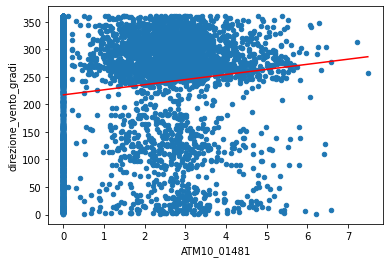

pearson:  0.14511893741046925  spearman:  0.1236699250952056  kendall:  0.08841897953583087


In [225]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

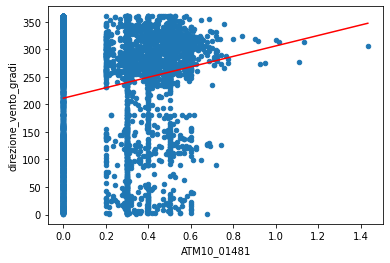

pearson:  0.1947036439442042  spearman:  0.16314945907353443  kendall:  0.11938841514091024


In [226]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)


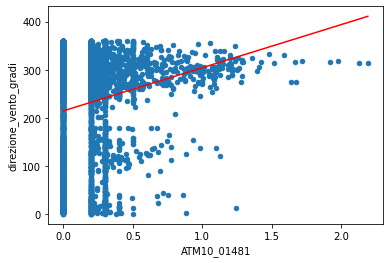

pearson:  0.20048989144559595  spearman:  0.1797536672468104  kendall:  0.13735521097895956


In [227]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

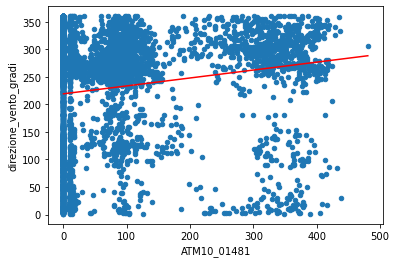

pearson:  0.17136171931668087  spearman:  0.19079352490741394  kendall:  0.1415834264657946


In [228]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

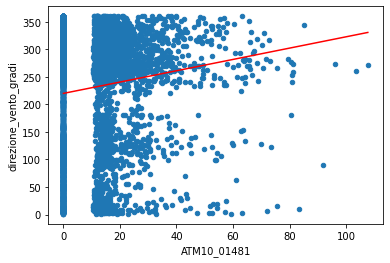

pearson:  0.13155247039000842  spearman:  0.13940172477274074  kendall:  0.09948987230557428


In [229]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

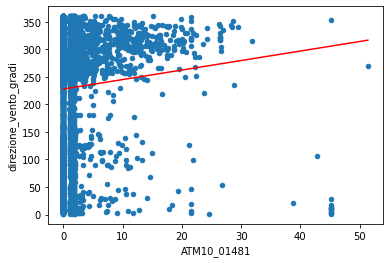

pearson:  0.07281088448838102  spearman:  0.16223687652375618  kendall:  0.12216200317375882


In [230]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [231]:
# correlazione con la direzione del vento per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3]).fillna(0)
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3  VOC_ppm  \
Data                                                                      
2021-04-12 00:00:00  0.2333333393  16.5666669210  5.1916667223      0.0   
2021-04-12 01:00:00  0.2000000030  15.6899998665  7.4600000858      0.0   
2021-04-12 02:00:00  0.2000000030  15.6833332380  6.9999998808      0.0   
2021-04-12 03:00:00  0.2000000030  17.6916666031  7.6416666508      0.0   
2021-04-12 04:00:00  0.2000000030  16.9083333810  6.0000000795      0.0   
...                           ...            ...           ...      ...   
2021-11-28 19:00:00  0.6999999881   9.5416667461  0.3000000119      0.0   
2021-11-28 20:00:00  0.6999999881   7.6333333651  0.3000000119      0.0   
2021-11-28 21:00:00  0.6999999881   7.5999999444  0.3000000119      0.0   
2021-11-28 22:00:00  0.6833333274   9.7999999126  0.3000000119      0.0   
2021-11-28 23:00:00  0.6500000060   9.3249999682  0.4416666826      0.0   

                         PIDVOC_ppb  TRS_ppb   postazione  
Data                                                       
2021-04-12 00:00:00  154.7166646322        0  ATM14_01486  
2021-04-12 01:00:00  147.2399993896        0  ATM14_01486  
2021-04-12 02:00:00  147.4499994914        0  ATM14_01486  
2021-04-12 03:00:00  151.2500012716        0  ATM14_01486  
2021-04-12 04:00:00  149.5666681925        0  ATM14_01486  
...                             ...      ...          ...  
2021-11-28 19:00:00  355.3000005086        0  ATM14_01486  
2021-11-28 20:00:00  358.7499974569        0  ATM14_01486  
2021-11-28 21:00:00  356.5666631063        0  ATM14_01486  
2021-11-28 22:00:00  349.5666631063        0  ATM14_01486  
2021-11-28 23:00:00  353.0000000000        0  ATM14_01486  

[3064 rows x 7 columns]

pearson:  -2  spearman:  -2  kendall:  -2


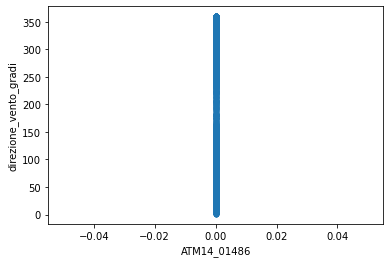

In [232]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

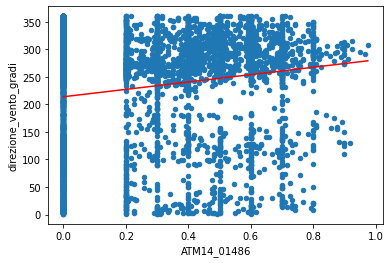

pearson:  0.1759208885616667  spearman:  0.15966750766734875  kendall:  0.11797491534902654


In [233]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

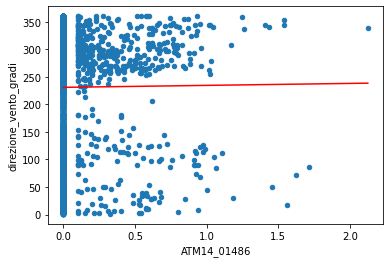

pearson:  0.005427998655059959  spearman:  0.051887203228035514  kendall:  0.04158899066002885


In [234]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

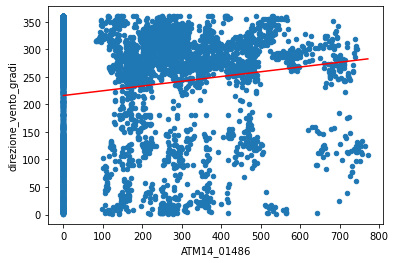

pearson:  0.163885258853356  spearman:  0.1601658607887568  kendall:  0.11663582489708477


In [235]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

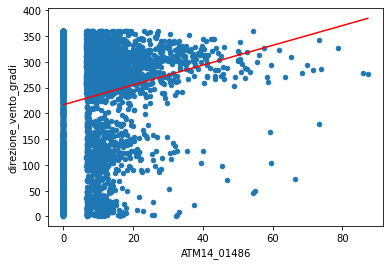

pearson:  0.17982283151228928  spearman:  0.16253184732193984  kendall:  0.11741089196760422


In [236]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

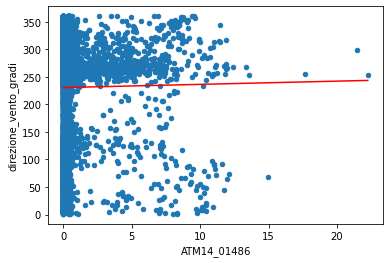

pearson:  0.011859362479529218  spearman:  0.11955870701049759  kendall:  0.08318615942030229


In [237]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# CORRELAZIONE 10

In [238]:
# correlazione con la pressione atmosferica per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

C6H6_ug_m3     H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                   
2021-04-12 00:00:00  0.2083333371  1.1499999888         0.0      0.0   
2021-04-12 01:00:00  0.2000000030  0.0000000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030  0.1000000015         0.0      0.0   
2021-04-12 03:00:00  0.2583333415  1.1999999891         0.0      0.0   
2021-04-12 04:00:00  0.2166666711  0.9999999795         0.0      0.0   
...                           ...           ...         ...      ...   
2021-11-28 19:00:00  0.1000000015  2.2333333244         0.0      0.0   
2021-11-28 20:00:00  0.1000000015  0.7166666569         0.0      0.0   
2021-11-28 21:00:00  0.1000000015  0.9249999921         0.0      0.0   
2021-11-28 22:00:00  0.1000000015  2.5749999781         0.0      0.0   
2021-11-28 23:00:00  0.1000000015  2.7250000040         0.0      0.0   

                        PIDVOC_ppb        TRS_ppb   postazione  
Data                                                            
2021-04-12 00:00:00  43.5833330154  13.8285712174  ATM05_01479  
2021-04-12 01:00:00  44.1799999237   5.5428570168  ATM05_01479  
2021-04-12 02:00:00  38.0500005086  19.4333333174  ATM05_01479  
2021-04-12 03:00:00  41.4166666667  10.1222219707  ATM05_01479  
2021-04-12 04:00:00  44.5999994278  19.8374994695  ATM05_01479  
...                            ...            ...          ...  
2021-11-28 19:00:00  30.8999996185   3.9399999976  ATM05_01479  
2021-11-28 20:00:00  23.1666666667  10.6999998093  ATM05_01479  
2021-11-28 21:00:00  16.8833336035  17.0500001907  ATM05_01479  
2021-11-28 22:00:00  15.8666667938  10.5999997854  ATM05_01479  
2021-11-28 23:00:00  15.6500002543   0.0000000000  ATM05_01479  

[2979 rows x 7 columns]

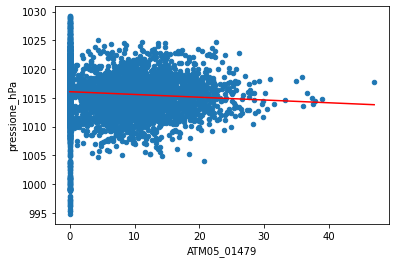

pearson:  -0.08022234087850973  spearman:  -0.14418207873141478  kendall:  -0.10299281662264534


In [239]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

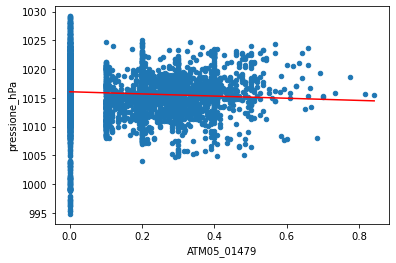

pearson:  -0.06885839063332067  spearman:  -0.1241689839604083  kendall:  -0.08544225625423586


In [240]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

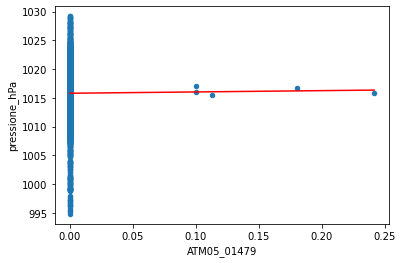

pearson:  0.0025827994439437457  spearman:  0.0029180886138721043  kendall:  0.002387280052841234


In [241]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

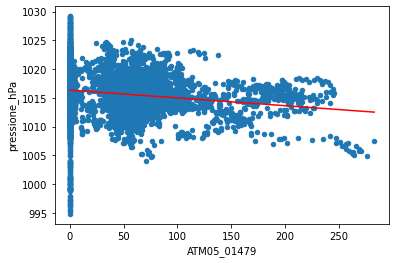

pearson:  -0.1662743918254271  spearman:  -0.19502237038408426  kendall:  -0.13989318456799274


In [242]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

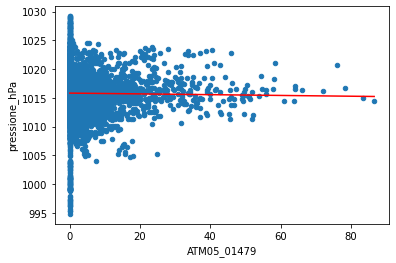

pearson:  -0.012880519584699048  spearman:  -0.13608798028676553  kendall:  -0.09798720796978597


In [243]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

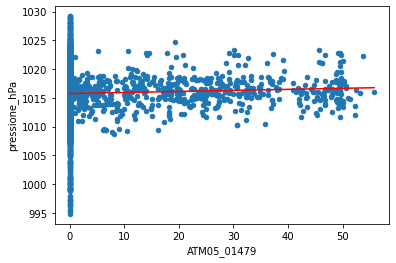

pearson:  0.03719214453607767  spearman:  0.020383997391656264  kendall:  0.016426533113097556


In [244]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [245]:
# correlazione con la pressione atmosferica per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7

C6H6_ug_m3      H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                    
2021-04-12 00:00:00  0.2416666734   4.0749999881         0.0      0.0   
2021-04-12 01:00:00  0.2000000030   3.8500000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030   3.7666666706         0.0      0.0   
2021-04-12 03:00:00  0.2000000030   4.2250000040         0.0      0.0   
2021-04-12 04:00:00  0.2000000030   4.0916666587         0.0      0.0   
...                           ...            ...         ...      ...   
2021-11-28 19:00:00  0.2000000030  28.1833332380         0.0      0.0   
2021-11-28 20:00:00  0.2000000030  25.9583333333         0.0      0.0   
2021-11-28 21:00:00  0.2000000030  26.7833334605         0.0      0.0   
2021-11-28 22:00:00  0.2000000030  27.5416668256         0.0      0.0   
2021-11-28 23:00:00  0.2000000030  28.7250002225         0.0      0.0   

                        PIDVOC_ppb  TRS_ppb   postazione  
Data                                                      
2021-04-12 00:00:00  21.9333333969      0.0  ATM07_01480  
2021-04-12 01:00:00  17.3600000381      0.0  ATM07_01480  
2021-04-12 02:00:00  14.1499998967      0.0  ATM07_01480  
2021-04-12 03:00:00  21.5833331744      0.0  ATM07_01480  
2021-04-12 04:00:00  22.8666667938      0.0  ATM07_01480  
...                            ...      ...          ...  
2021-11-28 19:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 20:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 21:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 22:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 23:00:00   0.0000000000      0.0  ATM07_01480  

[3075 rows x 7 columns]

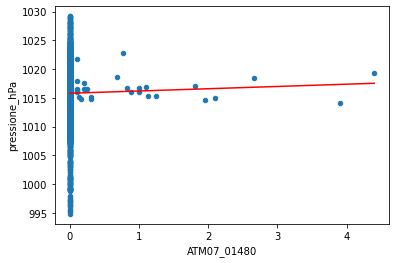

pearson:  0.01001646517895143  spearman:  0.016375153617971875  kendall:  0.013400060206579426


In [246]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

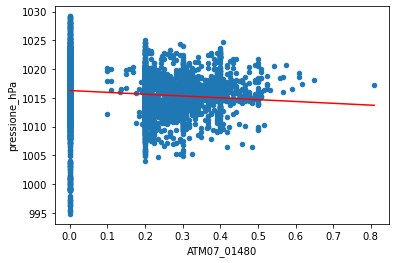

pearson:  -0.11190038875150791  spearman:  -0.16001434421268385  kendall:  -0.11351717607564907


In [247]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

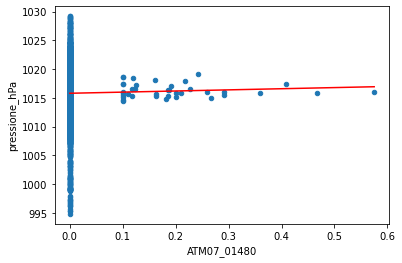

pearson:  0.008684069839184632  spearman:  0.011362555014648258  kendall:  0.009305682485111214


In [248]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

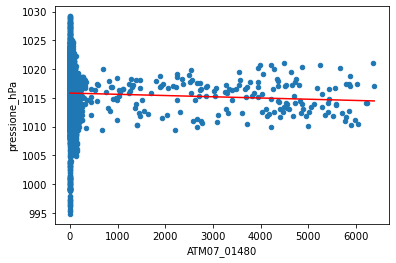

pearson:  -0.034389221872909846  spearman:  -0.17593615492968884  kendall:  -0.12740985372949992


In [249]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

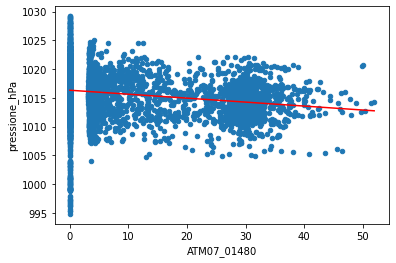

pearson:  -0.1900877309405524  spearman:  -0.23930286364886602  kendall:  -0.17417468387654989


In [250]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

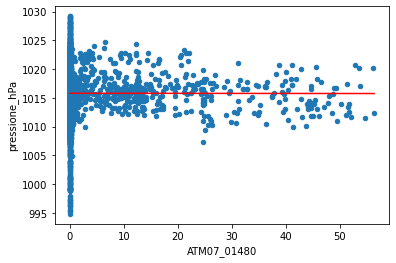

pearson:  -0.0013513315209755952  spearman:  -0.04252711875270421  kendall:  -0.03094801792068016


In [251]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [252]:
# correlazione con la pressione atmosferica per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3       VOC_ppm  \
Data                                                                           
2021-04-12 00:00:00  0.4166666716  26.1583334605  1.6333333651  0.2000000030   
2021-04-12 01:00:00  0.4000000060  25.9777776930  1.7000000477  0.2000000030   
2021-04-12 02:00:00  0.4000000060  26.0444446140  1.6777778202  0.2000000030   
2021-04-12 03:00:00  0.4700000018  27.4800001144  1.6000000238  0.2000000030   
2021-04-12 04:00:00  0.4000000060  26.3624999523  1.6125000268  0.2000000030   
...                           ...            ...           ...           ...   
2021-11-28 19:00:00  0.2000000030  13.5666666826  1.1750000219  0.2000000030   
2021-11-28 20:00:00  0.2000000030  11.7583332856  1.8749999702  0.2416666734   
2021-11-28 21:00:00  0.2000000030  11.7166666190  1.8499999642  0.2166666711   
2021-11-28 22:00:00  0.2000000030  12.3750000000  1.8749999702  0.2333333393   
2021-11-28 23:00:00  0.2000000030  12.9916667144  1.8833333055  0.2583333415   

                        PIDVOC_ppb       TRS_ppb   postazione  
Data                                                           
2021-04-12 00:00:00  80.9499994914  2.3500000238  ATM10_01481  
2021-04-12 01:00:00  87.5777782864  1.1333333353  ATM10_01481  
2021-04-12 02:00:00  88.6000001695  1.1666666791  ATM10_01481  
2021-04-12 03:00:00  84.5000000000  1.1833333497  ATM10_01481  
2021-04-12 04:00:00  87.8249998093  2.0125000067  ATM10_01481  
...                            ...           ...          ...  
2021-11-28 19:00:00  10.2999998728  1.9916666845  ATM10_01481  
2021-11-28 20:00:00  10.5666668415  2.6454544934  ATM10_01481  
2021-11-28 21:00:00  10.4499998093  2.1100000083  ATM10_01481  
2021-11-28 22:00:00  10.4499998887  0.5666666639  ATM10_01481  
2021-11-28 23:00:00  10.1166665554  2.1999999682  ATM10_01481  

[3051 rows x 7 columns]

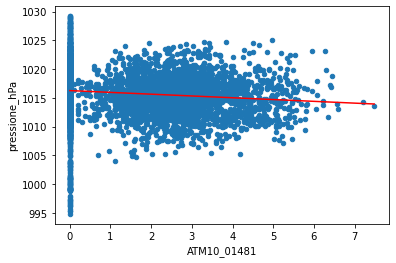

pearson:  -0.11823119636248393  spearman:  -0.16470988676869402  kendall:  -0.1181259702666218


In [253]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

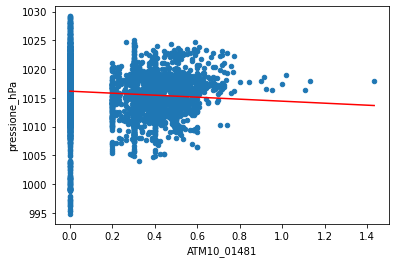

pearson:  -0.08643431815593329  spearman:  -0.125584386494664  kendall:  -0.08790116617554782


In [254]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

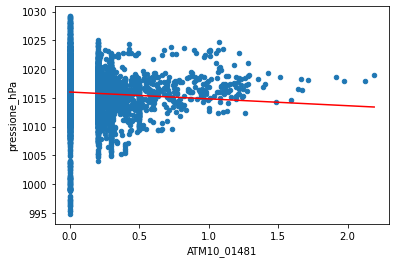

pearson:  -0.06452282188156631  spearman:  -0.18983473676159168  kendall:  -0.13921517019608606


In [255]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

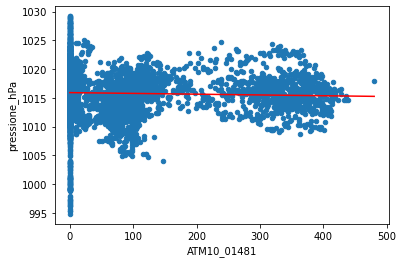

pearson:  -0.0391485264916261  spearman:  -0.15062407505586597  kendall:  -0.1045174863431353


In [256]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

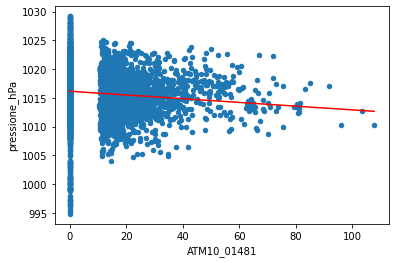

pearson:  -0.10043570256713087  spearman:  -0.16439713042353857  kendall:  -0.11654404881476303


In [257]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

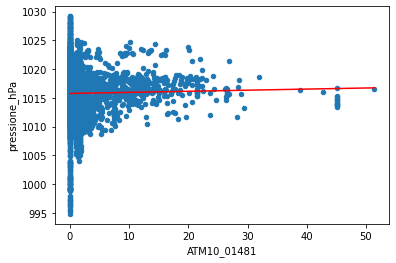

pearson:  0.019363852749980735  spearman:  -0.11990153674152851  kendall:  -0.08029430375348197


In [258]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [259]:
# correlazione con la pressione atmosferica per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3]).fillna(0)
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3  VOC_ppm  \
Data                                                                      
2021-04-12 00:00:00  0.2333333393  16.5666669210  5.1916667223      0.0   
2021-04-12 01:00:00  0.2000000030  15.6899998665  7.4600000858      0.0   
2021-04-12 02:00:00  0.2000000030  15.6833332380  6.9999998808      0.0   
2021-04-12 03:00:00  0.2000000030  17.6916666031  7.6416666508      0.0   
2021-04-12 04:00:00  0.2000000030  16.9083333810  6.0000000795      0.0   
...                           ...            ...           ...      ...   
2021-11-28 19:00:00  0.6999999881   9.5416667461  0.3000000119      0.0   
2021-11-28 20:00:00  0.6999999881   7.6333333651  0.3000000119      0.0   
2021-11-28 21:00:00  0.6999999881   7.5999999444  0.3000000119      0.0   
2021-11-28 22:00:00  0.6833333274   9.7999999126  0.3000000119      0.0   
2021-11-28 23:00:00  0.6500000060   9.3249999682  0.4416666826      0.0   

                         PIDVOC_ppb  TRS_ppb   postazione  
Data                                                       
2021-04-12 00:00:00  154.7166646322        0  ATM14_01486  
2021-04-12 01:00:00  147.2399993896        0  ATM14_01486  
2021-04-12 02:00:00  147.4499994914        0  ATM14_01486  
2021-04-12 03:00:00  151.2500012716        0  ATM14_01486  
2021-04-12 04:00:00  149.5666681925        0  ATM14_01486  
...                             ...      ...          ...  
2021-11-28 19:00:00  355.3000005086        0  ATM14_01486  
2021-11-28 20:00:00  358.7499974569        0  ATM14_01486  
2021-11-28 21:00:00  356.5666631063        0  ATM14_01486  
2021-11-28 22:00:00  349.5666631063        0  ATM14_01486  
2021-11-28 23:00:00  353.0000000000        0  ATM14_01486  

[3064 rows x 7 columns]

pearson:  -2  spearman:  -2  kendall:  -2


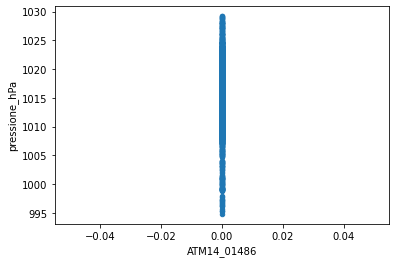

In [260]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

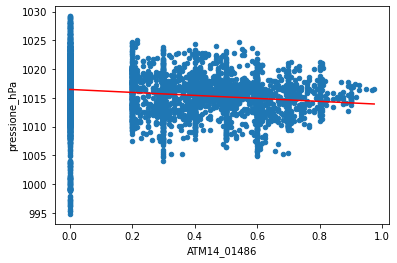

pearson:  -0.16530760122283242  spearman:  -0.22088596816452438  kendall:  -0.161597842233797


In [261]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

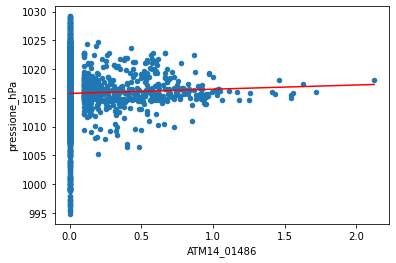

pearson:  0.026900363907713134  spearman:  0.028703204189929627  kendall:  0.022983766746584526


In [262]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

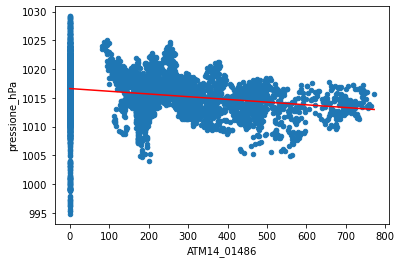

pearson:  -0.21685404343624157  spearman:  -0.25877746064048235  kendall:  -0.19284956224664898


In [263]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

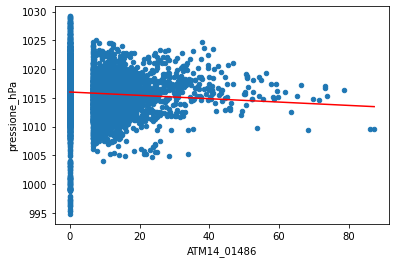

pearson:  -0.06601266817989734  spearman:  -0.1540500647672689  kendall:  -0.10800511385456599


In [264]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

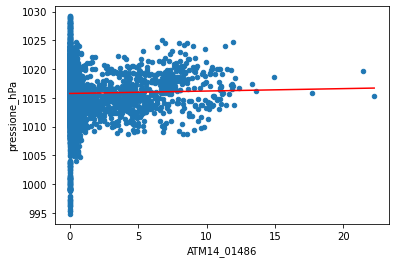

pearson:  0.02075010740606323  spearman:  -0.14312737805079245  kendall:  -0.1006703631520502


In [265]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# CORRELAZIONE 11

In [266]:
# correlazione con l'intensità del vento per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

C6H6_ug_m3     H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                   
2021-04-12 00:00:00  0.2083333371  1.1499999888         0.0      0.0   
2021-04-12 01:00:00  0.2000000030  0.0000000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030  0.1000000015         0.0      0.0   
2021-04-12 03:00:00  0.2583333415  1.1999999891         0.0      0.0   
2021-04-12 04:00:00  0.2166666711  0.9999999795         0.0      0.0   
...                           ...           ...         ...      ...   
2021-11-28 19:00:00  0.1000000015  2.2333333244         0.0      0.0   
2021-11-28 20:00:00  0.1000000015  0.7166666569         0.0      0.0   
2021-11-28 21:00:00  0.1000000015  0.9249999921         0.0      0.0   
2021-11-28 22:00:00  0.1000000015  2.5749999781         0.0      0.0   
2021-11-28 23:00:00  0.1000000015  2.7250000040         0.0      0.0   

                        PIDVOC_ppb        TRS_ppb   postazione  
Data                                                            
2021-04-12 00:00:00  43.5833330154  13.8285712174  ATM05_01479  
2021-04-12 01:00:00  44.1799999237   5.5428570168  ATM05_01479  
2021-04-12 02:00:00  38.0500005086  19.4333333174  ATM05_01479  
2021-04-12 03:00:00  41.4166666667  10.1222219707  ATM05_01479  
2021-04-12 04:00:00  44.5999994278  19.8374994695  ATM05_01479  
...                            ...            ...          ...  
2021-11-28 19:00:00  30.8999996185   3.9399999976  ATM05_01479  
2021-11-28 20:00:00  23.1666666667  10.6999998093  ATM05_01479  
2021-11-28 21:00:00  16.8833336035  17.0500001907  ATM05_01479  
2021-11-28 22:00:00  15.8666667938  10.5999997854  ATM05_01479  
2021-11-28 23:00:00  15.6500002543   0.0000000000  ATM05_01479  

[2979 rows x 7 columns]

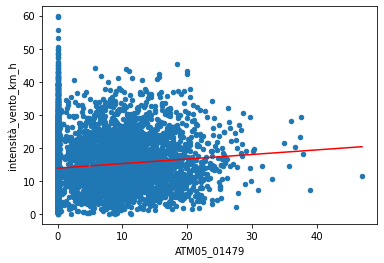

pearson:  0.11217210047859344  spearman:  0.15514655074074685  kendall:  0.11155943021346106


In [267]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

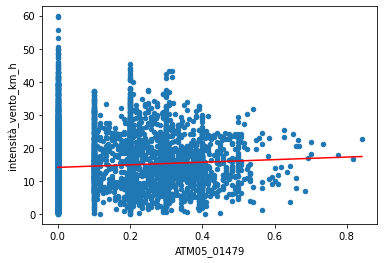

pearson:  0.06967418788981143  spearman:  0.12574545573038812  kendall:  0.08920782607561792


In [268]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

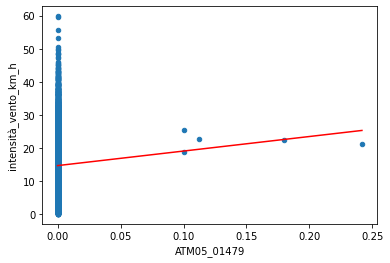

pearson:  0.024338964967398364  spearman:  0.0323252667284267  kendall:  0.026397772869579044


In [269]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

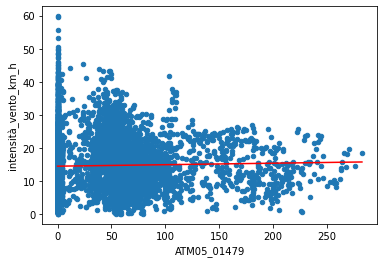

pearson:  0.026989407305198707  spearman:  0.10644657758695077  kendall:  0.07302714747080538


In [270]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

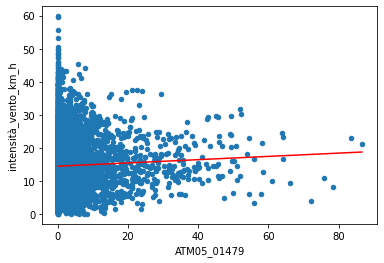

pearson:  0.04597363395482391  spearman:  0.12569577977519378  kendall:  0.0905977838645127


In [271]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

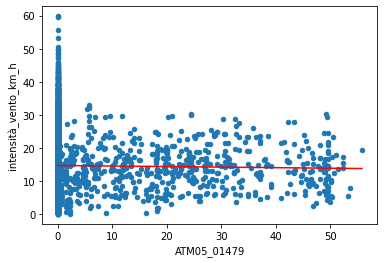

pearson:  -0.016755652696400024  spearman:  -0.0020283717676208755  kendall:  -0.001542153370712314


In [272]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [273]:
# correlazione con l'intensità del vento per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7

C6H6_ug_m3      H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                    
2021-04-12 00:00:00  0.2416666734   4.0749999881         0.0      0.0   
2021-04-12 01:00:00  0.2000000030   3.8500000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030   3.7666666706         0.0      0.0   
2021-04-12 03:00:00  0.2000000030   4.2250000040         0.0      0.0   
2021-04-12 04:00:00  0.2000000030   4.0916666587         0.0      0.0   
...                           ...            ...         ...      ...   
2021-11-28 19:00:00  0.2000000030  28.1833332380         0.0      0.0   
2021-11-28 20:00:00  0.2000000030  25.9583333333         0.0      0.0   
2021-11-28 21:00:00  0.2000000030  26.7833334605         0.0      0.0   
2021-11-28 22:00:00  0.2000000030  27.5416668256         0.0      0.0   
2021-11-28 23:00:00  0.2000000030  28.7250002225         0.0      0.0   

                        PIDVOC_ppb  TRS_ppb   postazione  
Data                                                      
2021-04-12 00:00:00  21.9333333969      0.0  ATM07_01480  
2021-04-12 01:00:00  17.3600000381      0.0  ATM07_01480  
2021-04-12 02:00:00  14.1499998967      0.0  ATM07_01480  
2021-04-12 03:00:00  21.5833331744      0.0  ATM07_01480  
2021-04-12 04:00:00  22.8666667938      0.0  ATM07_01480  
...                            ...      ...          ...  
2021-11-28 19:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 20:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 21:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 22:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 23:00:00   0.0000000000      0.0  ATM07_01480  

[3075 rows x 7 columns]

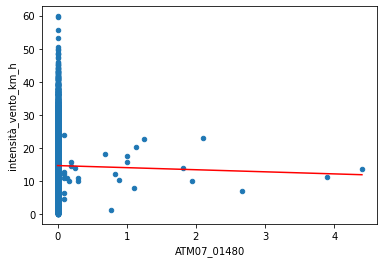

pearson:  -0.007801477467981628  spearman:  -0.008678992433189557  kendall:  -0.007074546770339862


In [274]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

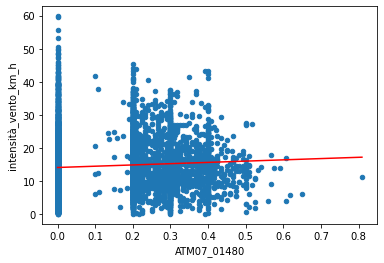

pearson:  0.06616903753649757  spearman:  0.10901021387831908  kendall:  0.07712776597603146


In [275]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

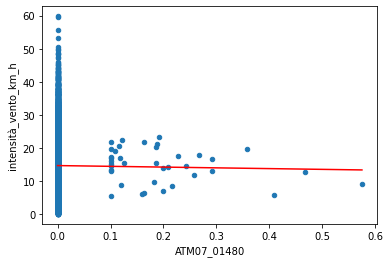

pearson:  -0.004922986874198372  spearman:  0.013290998406097874  kendall:  0.01083129381202864


In [276]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

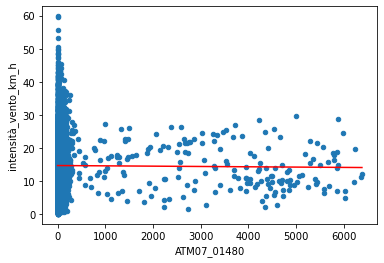

pearson:  -0.007382234016711908  spearman:  0.1321832480437206  kendall:  0.09487776089866674


In [277]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

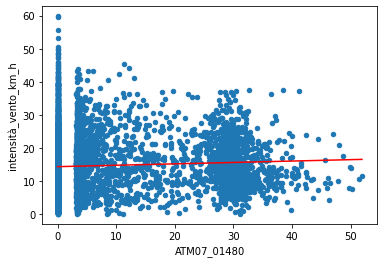

pearson:  0.05700952208865137  spearman:  0.15047990024424168  kendall:  0.1076197938948367


In [278]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

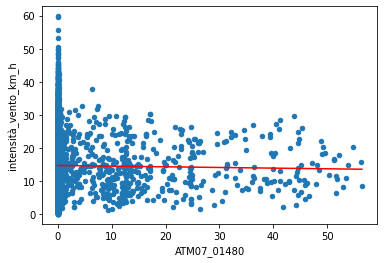

pearson:  -0.015158116960464598  spearman:  0.04964216882368241  kendall:  0.03674540812883798


In [279]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [280]:
# correlazione con l'intensità del vento per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3       VOC_ppm  \
Data                                                                           
2021-04-12 00:00:00  0.4166666716  26.1583334605  1.6333333651  0.2000000030   
2021-04-12 01:00:00  0.4000000060  25.9777776930  1.7000000477  0.2000000030   
2021-04-12 02:00:00  0.4000000060  26.0444446140  1.6777778202  0.2000000030   
2021-04-12 03:00:00  0.4700000018  27.4800001144  1.6000000238  0.2000000030   
2021-04-12 04:00:00  0.4000000060  26.3624999523  1.6125000268  0.2000000030   
...                           ...            ...           ...           ...   
2021-11-28 19:00:00  0.2000000030  13.5666666826  1.1750000219  0.2000000030   
2021-11-28 20:00:00  0.2000000030  11.7583332856  1.8749999702  0.2416666734   
2021-11-28 21:00:00  0.2000000030  11.7166666190  1.8499999642  0.2166666711   
2021-11-28 22:00:00  0.2000000030  12.3750000000  1.8749999702  0.2333333393   
2021-11-28 23:00:00  0.2000000030  12.9916667144  1.8833333055  0.2583333415   

                        PIDVOC_ppb       TRS_ppb   postazione  
Data                                                           
2021-04-12 00:00:00  80.9499994914  2.3500000238  ATM10_01481  
2021-04-12 01:00:00  87.5777782864  1.1333333353  ATM10_01481  
2021-04-12 02:00:00  88.6000001695  1.1666666791  ATM10_01481  
2021-04-12 03:00:00  84.5000000000  1.1833333497  ATM10_01481  
2021-04-12 04:00:00  87.8249998093  2.0125000067  ATM10_01481  
...                            ...           ...          ...  
2021-11-28 19:00:00  10.2999998728  1.9916666845  ATM10_01481  
2021-11-28 20:00:00  10.5666668415  2.6454544934  ATM10_01481  
2021-11-28 21:00:00  10.4499998093  2.1100000083  ATM10_01481  
2021-11-28 22:00:00  10.4499998887  0.5666666639  ATM10_01481  
2021-11-28 23:00:00  10.1166665554  2.1999999682  ATM10_01481  

[3051 rows x 7 columns]

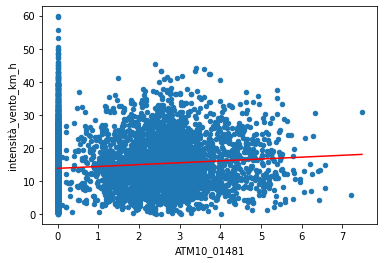

pearson:  0.10458216058488644  spearman:  0.1463197060772979  kendall:  0.10460139946619344


In [281]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

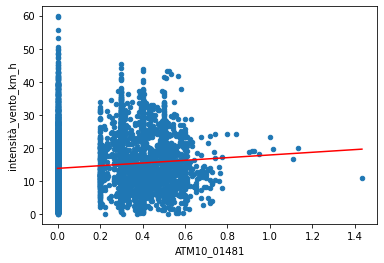

pearson:  0.09835225567124212  spearman:  0.1386575420867972  kendall:  0.10198410968296631


In [282]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

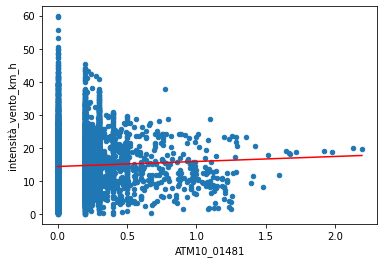

pearson:  0.04014752019650322  spearman:  0.12419957233495703  kendall:  0.08902642377810245


In [283]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

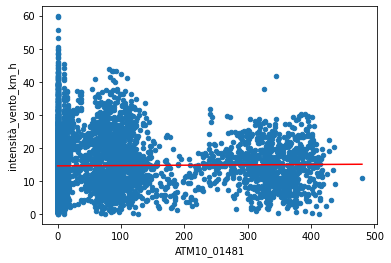

pearson:  0.01439881802039956  spearman:  0.12317880890831366  kendall:  0.08562512724289842


In [284]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

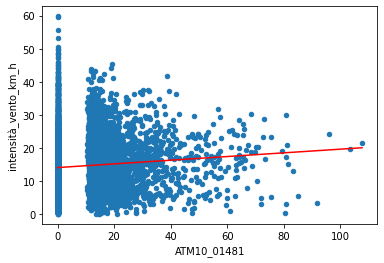

pearson:  0.0841189826886605  spearman:  0.13511987349578955  kendall:  0.09629288236632373


In [285]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

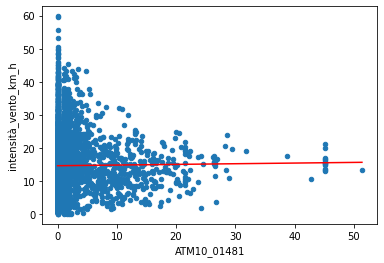

pearson:  0.009942720890377807  spearman:  0.14223955580710299  kendall:  0.10050314366969723


In [286]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)


In [287]:
# correlazione con l'intensità del vento per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3])
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3  VOC_ppm  \
Data                                                                      
2021-04-12 00:00:00  0.2333333393  16.5666669210  5.1916667223      NaN   
2021-04-12 01:00:00  0.2000000030  15.6899998665  7.4600000858      NaN   
2021-04-12 02:00:00  0.2000000030  15.6833332380  6.9999998808      NaN   
2021-04-12 03:00:00  0.2000000030  17.6916666031  7.6416666508      NaN   
2021-04-12 04:00:00  0.2000000030  16.9083333810  6.0000000795      NaN   
...                           ...            ...           ...      ...   
2021-11-28 19:00:00  0.6999999881   9.5416667461  0.3000000119      NaN   
2021-11-28 20:00:00  0.6999999881   7.6333333651  0.3000000119      NaN   
2021-11-28 21:00:00  0.6999999881   7.5999999444  0.3000000119      NaN   
2021-11-28 22:00:00  0.6833333274   9.7999999126  0.3000000119      NaN   
2021-11-28 23:00:00  0.6500000060   9.3249999682  0.4416666826      NaN   

                         PIDVOC_ppb  TRS_ppb   postazione  
Data                                                       
2021-04-12 00:00:00  154.7166646322        0  ATM14_01486  
2021-04-12 01:00:00  147.2399993896        0  ATM14_01486  
2021-04-12 02:00:00  147.4499994914        0  ATM14_01486  
2021-04-12 03:00:00  151.2500012716        0  ATM14_01486  
2021-04-12 04:00:00  149.5666681925        0  ATM14_01486  
...                             ...      ...          ...  
2021-11-28 19:00:00  355.3000005086        0  ATM14_01486  
2021-11-28 20:00:00  358.7499974569        0  ATM14_01486  
2021-11-28 21:00:00  356.5666631063        0  ATM14_01486  
2021-11-28 22:00:00  349.5666631063        0  ATM14_01486  
2021-11-28 23:00:00  353.0000000000        0  ATM14_01486  

[3064 rows x 7 columns]

pearson:  -2  spearman:  -2  kendall:  -2


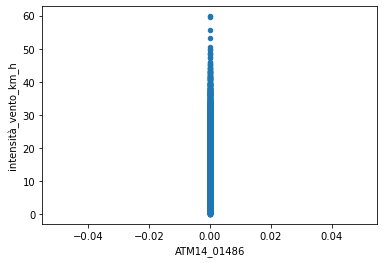

In [288]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

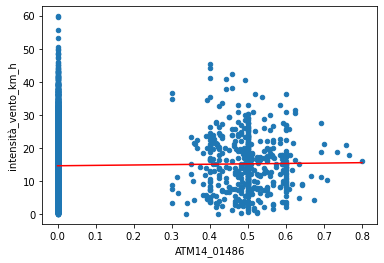

pearson:  0.01974489839378658  spearman:  0.02510949829442881  kendall:  0.019911154189605023


In [289]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

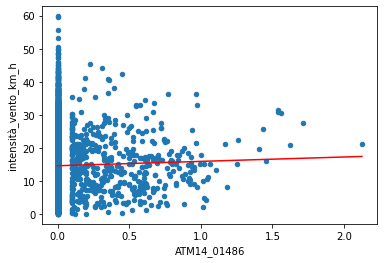

pearson:  0.023744540409551543  spearman:  0.02512282227892456  kendall:  0.019982802963538215


In [290]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

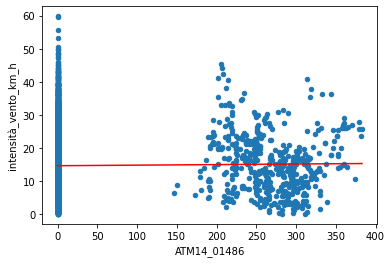

pearson:  0.01568767639516129  spearman:  0.022920096348201174  kendall:  0.01824116774950882


In [291]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

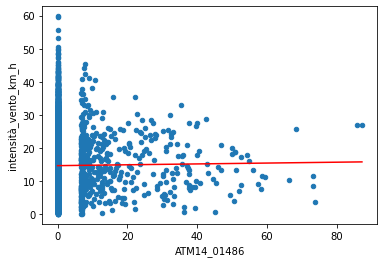

pearson:  0.009704714428137936  spearman:  0.026289302561888696  kendall:  0.020882384499158652


In [292]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

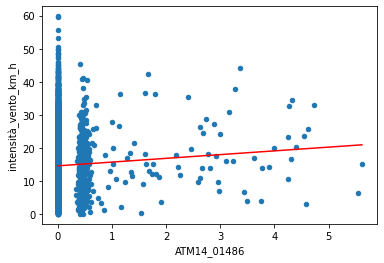

pearson:  0.04586667343388993  spearman:  0.027666423551557587  kendall:  0.022096931852819794


In [293]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

# Correlazione umidità

In [307]:
# correlazione con l'intensità del vento per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

C6H6_ug_m3     H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                   
2021-04-12 00:00:00  0.2083333371  1.1499999888         0.0      0.0   
2021-04-12 01:00:00  0.2000000030  0.0000000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030  0.1000000015         0.0      0.0   
2021-04-12 03:00:00  0.2583333415  1.1999999891         0.0      0.0   
2021-04-12 04:00:00  0.2166666711  0.9999999795         0.0      0.0   
...                           ...           ...         ...      ...   
2021-11-28 19:00:00  0.1000000015  2.2333333244         0.0      0.0   
2021-11-28 20:00:00  0.1000000015  0.7166666569         0.0      0.0   
2021-11-28 21:00:00  0.1000000015  0.9249999921         0.0      0.0   
2021-11-28 22:00:00  0.1000000015  2.5749999781         0.0      0.0   
2021-11-28 23:00:00  0.1000000015  2.7250000040         0.0      0.0   

                        PIDVOC_ppb        TRS_ppb   postazione  
Data                                                            
2021-04-12 00:00:00  43.5833330154  13.8285712174  ATM05_01479  
2021-04-12 01:00:00  44.1799999237   5.5428570168  ATM05_01479  
2021-04-12 02:00:00  38.0500005086  19.4333333174  ATM05_01479  
2021-04-12 03:00:00  41.4166666667  10.1222219707  ATM05_01479  
2021-04-12 04:00:00  44.5999994278  19.8374994695  ATM05_01479  
...                            ...            ...          ...  
2021-11-28 19:00:00  30.8999996185   3.9399999976  ATM05_01479  
2021-11-28 20:00:00  23.1666666667  10.6999998093  ATM05_01479  
2021-11-28 21:00:00  16.8833336035  17.0500001907  ATM05_01479  
2021-11-28 22:00:00  15.8666667938  10.5999997854  ATM05_01479  
2021-11-28 23:00:00  15.6500002543   0.0000000000  ATM05_01479  

[2979 rows x 7 columns]

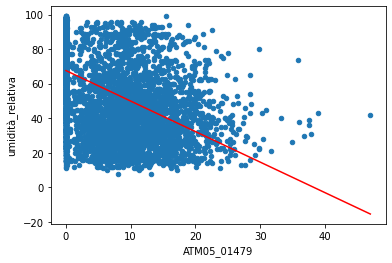

pearson:  -0.4834503182870508  spearman:  -0.5417057712251889  kendall:  -0.3915932932614283


In [308]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[4], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

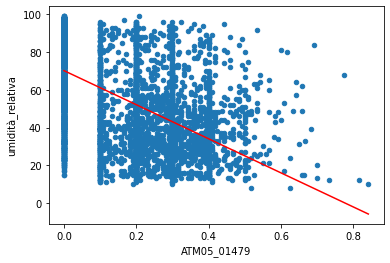

pearson:  -0.5433533810034608  spearman:  -0.571994795037759  kendall:  -0.4210271943172834


In [309]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[4], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

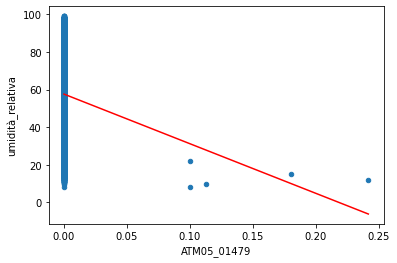

pearson:  -0.04913645318713224  spearman:  -0.049866430347657566  kendall:  -0.04096038445305657


In [310]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[4], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

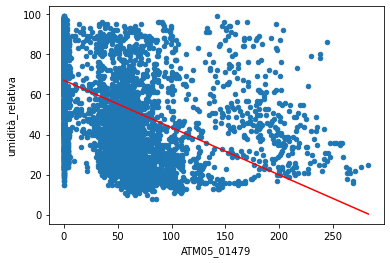

pearson:  -0.47655412307953976  spearman:  -0.5865197807981195  kendall:  -0.43397483113867813


In [311]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[4], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

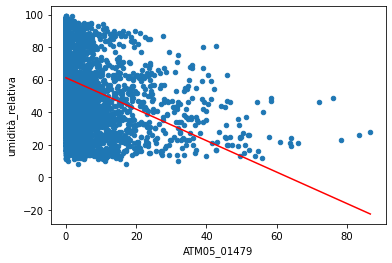

pearson:  -0.3027851525858544  spearman:  -0.48606226202467356  kendall:  -0.3567560620719048


In [312]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[4], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

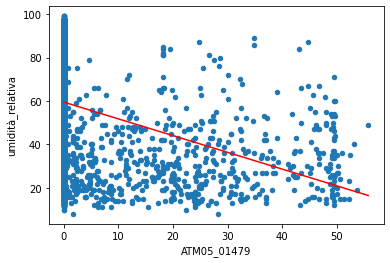

pearson:  -0.2600668025635565  spearman:  -0.3348559731397592  kendall:  -0.2673470211790748


In [313]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[4], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [314]:
# correlazione con l'intensità del vento per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7

C6H6_ug_m3      H2S_ug_m3  H2SJ_ug_m3  VOC_ppm  \
Data                                                                    
2021-04-12 00:00:00  0.2416666734   4.0749999881         0.0      0.0   
2021-04-12 01:00:00  0.2000000030   3.8500000000         0.0      0.0   
2021-04-12 02:00:00  0.2000000030   3.7666666706         0.0      0.0   
2021-04-12 03:00:00  0.2000000030   4.2250000040         0.0      0.0   
2021-04-12 04:00:00  0.2000000030   4.0916666587         0.0      0.0   
...                           ...            ...         ...      ...   
2021-11-28 19:00:00  0.2000000030  28.1833332380         0.0      0.0   
2021-11-28 20:00:00  0.2000000030  25.9583333333         0.0      0.0   
2021-11-28 21:00:00  0.2000000030  26.7833334605         0.0      0.0   
2021-11-28 22:00:00  0.2000000030  27.5416668256         0.0      0.0   
2021-11-28 23:00:00  0.2000000030  28.7250002225         0.0      0.0   

                        PIDVOC_ppb  TRS_ppb   postazione  
Data                                                      
2021-04-12 00:00:00  21.9333333969      0.0  ATM07_01480  
2021-04-12 01:00:00  17.3600000381      0.0  ATM07_01480  
2021-04-12 02:00:00  14.1499998967      0.0  ATM07_01480  
2021-04-12 03:00:00  21.5833331744      0.0  ATM07_01480  
2021-04-12 04:00:00  22.8666667938      0.0  ATM07_01480  
...                            ...      ...          ...  
2021-11-28 19:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 20:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 21:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 22:00:00   0.0000000000      0.0  ATM07_01480  
2021-11-28 23:00:00   0.0000000000      0.0  ATM07_01480  

[3075 rows x 7 columns]

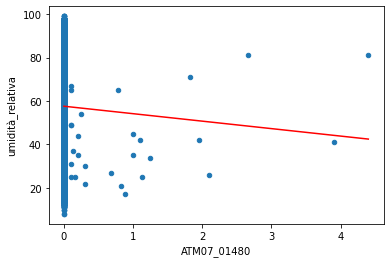

pearson:  -0.014351670850639622  spearman:  -0.04321901297087643  kendall:  -0.03547453609255562


In [315]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[4], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

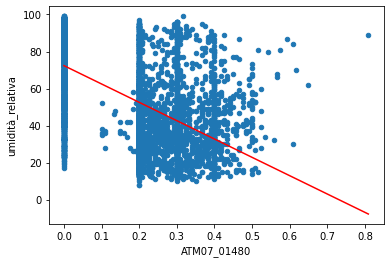

pearson:  -0.5742409367790277  spearman:  -0.5756468035574351  kendall:  -0.4251235024078714


In [316]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[4], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

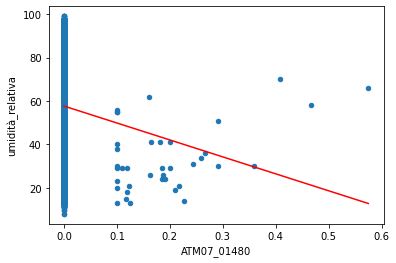

pearson:  -0.056392205170400236  spearman:  -0.07791247866783325  kendall:  -0.0638819119535834


In [317]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[4], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

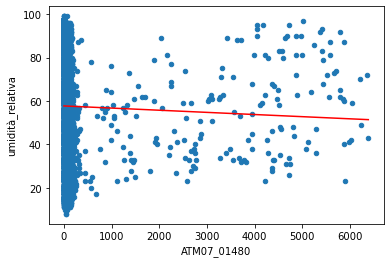

pearson:  -0.026077351106954114  spearman:  -0.44982535704762655  kendall:  -0.3258648643117304


In [318]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[4], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

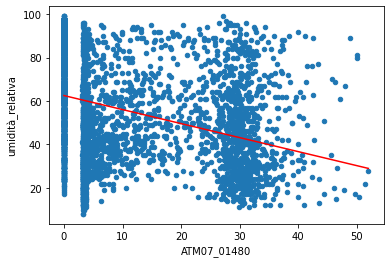

pearson:  -0.29270087515889875  spearman:  -0.5109562936151658  kendall:  -0.3546229578432304


In [319]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[4], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

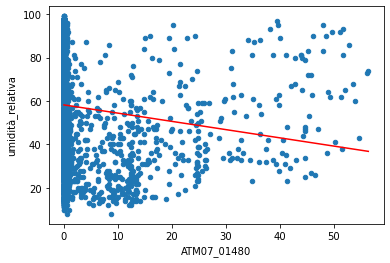

pearson:  -0.09648753385452798  spearman:  -0.36643977539206846  kendall:  -0.2787959042787912


In [320]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[4], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [321]:
# correlazione con l'intensità del vento per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3       VOC_ppm  \
Data                                                                           
2021-04-12 00:00:00  0.4166666716  26.1583334605  1.6333333651  0.2000000030   
2021-04-12 01:00:00  0.4000000060  25.9777776930  1.7000000477  0.2000000030   
2021-04-12 02:00:00  0.4000000060  26.0444446140  1.6777778202  0.2000000030   
2021-04-12 03:00:00  0.4700000018  27.4800001144  1.6000000238  0.2000000030   
2021-04-12 04:00:00  0.4000000060  26.3624999523  1.6125000268  0.2000000030   
...                           ...            ...           ...           ...   
2021-11-28 19:00:00  0.2000000030  13.5666666826  1.1750000219  0.2000000030   
2021-11-28 20:00:00  0.2000000030  11.7583332856  1.8749999702  0.2416666734   
2021-11-28 21:00:00  0.2000000030  11.7166666190  1.8499999642  0.2166666711   
2021-11-28 22:00:00  0.2000000030  12.3750000000  1.8749999702  0.2333333393   
2021-11-28 23:00:00  0.2000000030  12.9916667144  1.8833333055  0.2583333415   

                        PIDVOC_ppb       TRS_ppb   postazione  
Data                                                           
2021-04-12 00:00:00  80.9499994914  2.3500000238  ATM10_01481  
2021-04-12 01:00:00  87.5777782864  1.1333333353  ATM10_01481  
2021-04-12 02:00:00  88.6000001695  1.1666666791  ATM10_01481  
2021-04-12 03:00:00  84.5000000000  1.1833333497  ATM10_01481  
2021-04-12 04:00:00  87.8249998093  2.0125000067  ATM10_01481  
...                            ...           ...          ...  
2021-11-28 19:00:00  10.2999998728  1.9916666845  ATM10_01481  
2021-11-28 20:00:00  10.5666668415  2.6454544934  ATM10_01481  
2021-11-28 21:00:00  10.4499998093  2.1100000083  ATM10_01481  
2021-11-28 22:00:00  10.4499998887  0.5666666639  ATM10_01481  
2021-11-28 23:00:00  10.1166665554  2.1999999682  ATM10_01481  

[3051 rows x 7 columns]

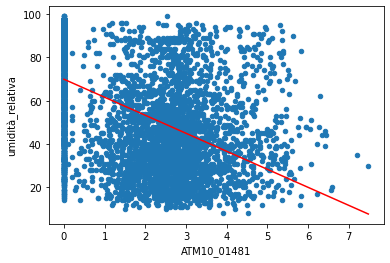

pearson:  -0.5192854601122604  spearman:  -0.5431665036596518  kendall:  -0.3917027974397093


In [322]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[4], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

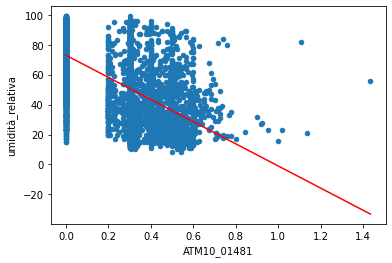

pearson:  -0.6045119701857858  spearman:  -0.6062770455935369  kendall:  -0.45620584928469904


In [323]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[4], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

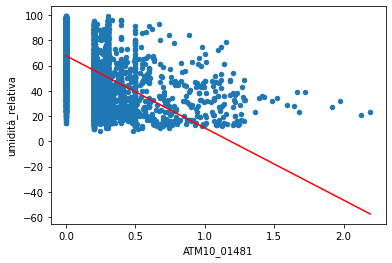

pearson:  -0.5095021278601413  spearman:  -0.5948463063741927  kendall:  -0.4508805402234568


In [324]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[4], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

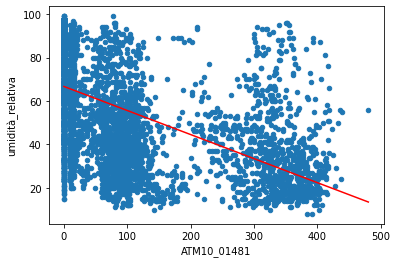

pearson:  -0.5245008350841616  spearman:  -0.6420320852672664  kendall:  -0.4792374931240522


In [325]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[4], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

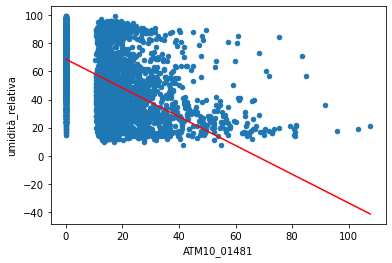

pearson:  -0.5191350929584286  spearman:  -0.574726622877156  kendall:  -0.41870397686131827


In [326]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[4], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

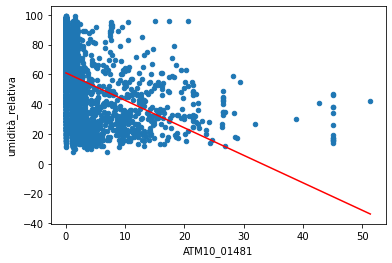

pearson:  -0.30923303457776913  spearman:  -0.5663721628601915  kendall:  -0.4122378546343671


In [327]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[4], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)


In [328]:
# correlazione con l'intensità del vento per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3])
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

C6H6_ug_m3      H2S_ug_m3    H2SJ_ug_m3  VOC_ppm  \
Data                                                                      
2021-04-12 00:00:00  0.2333333393  16.5666669210  5.1916667223      NaN   
2021-04-12 01:00:00  0.2000000030  15.6899998665  7.4600000858      NaN   
2021-04-12 02:00:00  0.2000000030  15.6833332380  6.9999998808      NaN   
2021-04-12 03:00:00  0.2000000030  17.6916666031  7.6416666508      NaN   
2021-04-12 04:00:00  0.2000000030  16.9083333810  6.0000000795      NaN   
...                           ...            ...           ...      ...   
2021-11-28 19:00:00  0.6999999881   9.5416667461  0.3000000119      NaN   
2021-11-28 20:00:00  0.6999999881   7.6333333651  0.3000000119      NaN   
2021-11-28 21:00:00  0.6999999881   7.5999999444  0.3000000119      NaN   
2021-11-28 22:00:00  0.6833333274   9.7999999126  0.3000000119      NaN   
2021-11-28 23:00:00  0.6500000060   9.3249999682  0.4416666826      NaN   

                         PIDVOC_ppb  TRS_ppb   postazione  
Data                                                       
2021-04-12 00:00:00  154.7166646322        0  ATM14_01486  
2021-04-12 01:00:00  147.2399993896        0  ATM14_01486  
2021-04-12 02:00:00  147.4499994914        0  ATM14_01486  
2021-04-12 03:00:00  151.2500012716        0  ATM14_01486  
2021-04-12 04:00:00  149.5666681925        0  ATM14_01486  
...                             ...      ...          ...  
2021-11-28 19:00:00  355.3000005086        0  ATM14_01486  
2021-11-28 20:00:00  358.7499974569        0  ATM14_01486  
2021-11-28 21:00:00  356.5666631063        0  ATM14_01486  
2021-11-28 22:00:00  349.5666631063        0  ATM14_01486  
2021-11-28 23:00:00  353.0000000000        0  ATM14_01486  

[3064 rows x 7 columns]

pearson:  -2  spearman:  -2  kendall:  -2


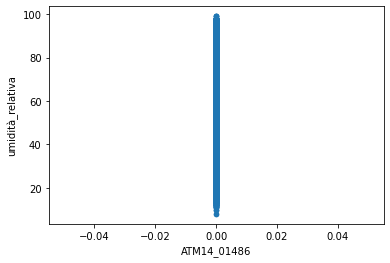

In [329]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[4], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

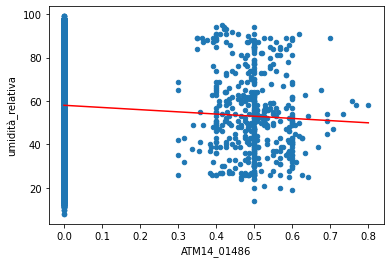

pearson:  -0.057459900452953176  spearman:  -0.05389821649872387  kendall:  -0.0435995818541535


In [330]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[4], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

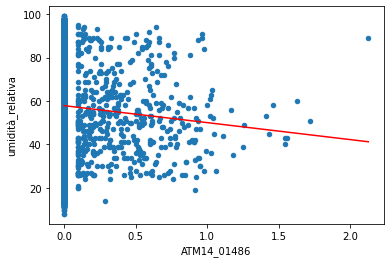

pearson:  -0.04723725695817264  spearman:  -0.052737652373659696  kendall:  -0.04228654046091277


In [331]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[4], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

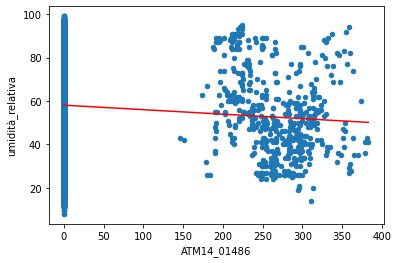

pearson:  -0.06358028775683476  spearman:  -0.055800997287805194  kendall:  -0.04558775729116743


In [332]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[4], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

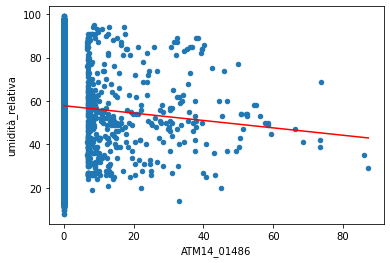

pearson:  -0.042651277188870525  spearman:  -0.05269573704947403  kendall:  -0.04226472283593109


In [333]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[4], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

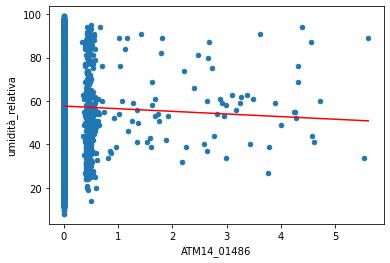

pearson:  -0.016514729166261656  spearman:  -0.05129524091354736  kendall:  -0.04068125983836119


In [334]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[4], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[4])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

# Altre correlazioni, anche spurie

## calcolo correlazione tra i dati meteo e i fallimenti giornalieri

In [294]:
df1 = df_DatiMeteo.copy()
df1['Giorno'] = pd.to_datetime(df1.Data.dt.strftime('%Y/%m/%d'))
df1 = df1.groupby(['Giorno']).mean()
df_nuovo = df1.merge(df_Fail_ND, on= 'Giorno')

In [295]:
df_nuovo

Giorno  temperatura_gradiC    pressione_hPa  intensità_vento_km_h  \
0   2021-04-12       14.5532102333  1019.0000000000          9.2184421867   
1   2021-04-13        8.6704604125  1017.5416666667         24.3623620000   
2   2021-04-14        4.3467103554  1021.3833333333         30.6183717917   
3   2021-04-15        4.8871270100  1021.5708333333         13.4111311750   
4   2021-04-16        4.6808770042  1017.0750000000         13.4124664958   
..         ...                 ...              ...                   ...   
127 2021-11-24        8.9933771208  1018.6375000000         12.9304147708   
128 2021-11-25        9.7775437833  1011.1666666667          5.8988277250   
129 2021-11-26        8.3046271000  1002.1125000000         37.7325642917   
130 2021-11-27        7.5417104250  1000.2333333333         37.6644851250   
131 2021-11-28        7.6787938083   997.4875000000         39.6162832083   

     direzione_vento_gradi  umidità_relativa  precipitazioni  count  
0           208.2432833333     46.6000000000    0.0000000000     48  
1           253.7933245833     72.2083333333    0.0125000000     43  
2           333.5009300000     74.5833333333    0.0125000000    337  
3           203.7779434792     67.7916666667    0.0000000000    380  
4            57.5458903125     73.7083333333    0.0416666667     43  
..                     ...               ...             ...    ...  
127          92.5281422083     84.3750000000    0.0625000000     10  
128         158.1244851667     86.0833333333    0.0791666667     10  
129         247.1577183333     86.9166666667    0.5000000000      9  
130         235.0498420833     86.3750000000    1.0208333333      9  
131         238.2624462500     82.1250000000    0.0708333333      8  

[132 rows x 8 columns]

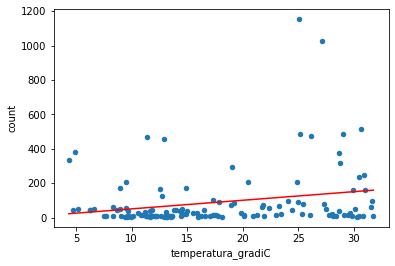

pearson:  0.22787014131976682  spearman:  0.21771138054480116  kendall:  0.147981234225906


In [296]:
# correlazione tra fallimenti e temperatura in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[0], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

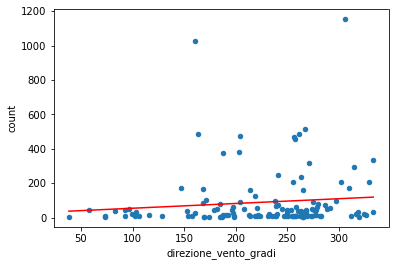

pearson:  0.1044983474607595  spearman:  0.16240712996506732  kendall:  0.11156944788640863


In [297]:
# correlazione tra fallimenti e direzione del vento in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[1], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

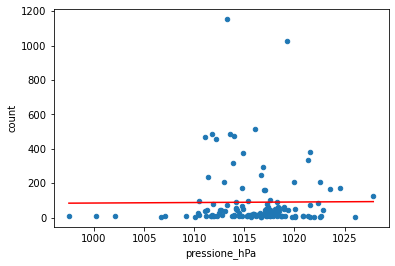

pearson:  0.0077123808231395015  spearman:  0.032643045631162534  kendall:  0.026493440816415605


In [298]:
# correlazione tra fallimenti e pressione atmosferica in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[2], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

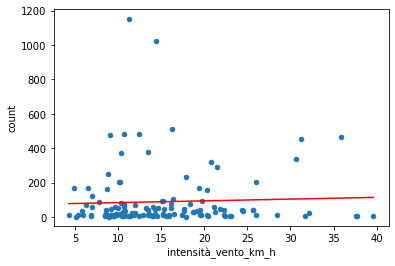

pearson:  0.04356350466782678  spearman:  0.06052222371934248  kendall:  0.04434768849041348


In [299]:
# correlazione tra fallimenti e intensità del vento in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[3], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

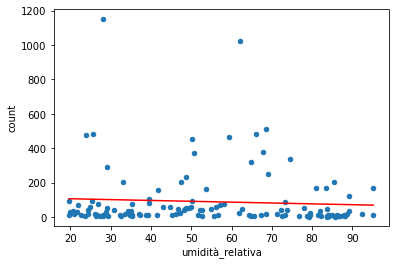

pearson:  -0.06670568833536607  spearman:  -0.1875098964758957  kendall:  -0.11127726632569669


In [300]:
# correlazione tra fallimenti e umidità relativa in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[4], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

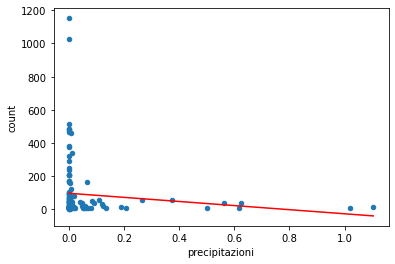

pearson:  -0.12051768500022716  spearman:  -0.14611360489099018  kendall:  -0.11164002845036428


In [301]:
# correlazione tra fallimenti e precipitazioni in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[5], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

# Odori

In [302]:
# Considerando che la massa molare del H2S è 34.08 g/mol
# Per convertire il ppm in ug/m3 basta moliplicarlo 
# per il peso molecolare (PM) della sostanza espressa in grammi 
# e dividere tutto per 24,45 m3mol−1
odore_min = (0.0005*34.08)/(24.45)
odore_max = (0.3*34.08)/(24.45)
print('La soglia minima per il cattivo odore in ug_m3 è: ',odore_min)
print('La soglia massima per il cattivo odore in ug_m3 è: ',odore_max)

La soglia minima per il cattivo odore in ug_m3 è:  0.0006969325153374233
La soglia massima per il cattivo odore in ug_m3 è:  0.4181595092024539


## ATM05

In [303]:
df_H2S = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM05_01479'][['Data','H2S_ug_m3']].reset_index(drop = True)
df_H2SJ = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM05_01479'][['Data','H2SJ_ug_m3']].reset_index(drop = True)
df_od = pd.concat([df_H2S,df_H2SJ]).reset_index().drop(['index'], axis = 1) 
df_od['Data'] = pd.to_datetime(df_od.Data.dt.strftime('%Y/%m/%d'))
df_od = df_od.groupby('Data').mean()
df_od.insert(1,'H2S_odore', df_od.H2S_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od.insert(3,'H2SJ_odore', df_od.H2SJ_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od

H2S_ug_m3 H2S_odore  H2SJ_ug_m3 H2SJ_odore
Data                                                     
2021-04-12  6.0751748377     forte         0.0    assente
2021-04-13  4.2653846195     forte         0.0    assente
2021-04-14  2.7607655389     forte         0.0    assente
2021-04-15  4.5106951985     forte         0.0    assente
2021-04-16  3.4403041809     forte         0.0    assente
...                  ...       ...         ...        ...
2021-11-24  3.6576923049     forte         0.0    assente
2021-11-25  4.1741258799     forte         0.0    assente
2021-11-26  2.9585365814     forte         0.0    assente
2021-11-27  2.4749128915     forte         0.0    assente
2021-11-28  2.7379790935     forte         0.0    assente

[129 rows x 4 columns]

## ATM07

In [304]:
df_H2S = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM07_01480'][['Data','H2S_ug_m3']].reset_index(drop = True)
df_H2SJ = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM07_01480'][['Data','H2SJ_ug_m3']].reset_index(drop = True)
df_od = pd.concat([df_H2S,df_H2SJ]).reset_index().drop(['index'], axis = 1) 
df_od['Data'] = pd.to_datetime(df_od.Data.dt.strftime('%Y/%m/%d'))
df_od = df_od.groupby('Data').mean()
df_od.insert(1,'H2S_odore', df_od.H2S_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od.insert(3,'H2SJ_odore', df_od.H2SJ_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od

H2S_ug_m3 H2S_odore    H2SJ_ug_m3 H2SJ_odore
Data                                                        
2021-04-12  10.7814685365     forte  0.0000000000    assente
2021-04-13   8.3477193004     forte  0.1014035106     debole
2021-04-14   7.1701421896     forte  0.0587677739     debole
2021-04-15   8.8671795001     forte  0.0128205130     debole
2021-04-16   7.4617021236     forte  0.0365248232     debole
...                   ...       ...           ...        ...
2021-11-24  29.8541957282     forte  0.6475524569      forte
2021-11-25  29.6783216450     forte  0.6010489430      forte
2021-11-26  28.2685314992     forte  2.1723776051      forte
2021-11-27  28.2172535305     forte  2.3116197280      forte
2021-11-28  28.2049122927     forte  1.7147368180      forte

[131 rows x 4 columns]

## ATM10

In [305]:
df_H2S = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM10_01481'][['Data','H2S_ug_m3']].reset_index(drop = True)
df_H2SJ = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM10_01481'][['Data','H2SJ_ug_m3']].reset_index(drop = True)
df_od = pd.concat([df_H2S,df_H2SJ]).reset_index().drop(['index'], axis = 1) 
df_od['Data'] = pd.to_datetime(df_od.Data.dt.strftime('%Y/%m/%d'))
df_od = df_od.groupby('Data').mean()
df_od.insert(1,'H2S_odore', df_od.H2S_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od.insert(3,'H2SJ_odore', df_od.H2SJ_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od

H2S_ug_m3 H2S_odore    H2SJ_ug_m3 H2SJ_odore
Data                                                        
2021-04-12  35.0615999603     forte  1.5716000259      forte
2021-04-13  25.5690195981     forte  1.6035294124      forte
2021-04-14  14.5850267308     forte  1.4096256858      forte
2021-04-15  16.2728204874     forte  1.7707692305      forte
2021-04-16  14.3409893858     forte  1.5897526514      forte
...                   ...       ...           ...        ...
2021-11-24  15.0876324927     forte  1.6575971985      forte
2021-11-25  15.2659649129     forte  1.1157895005      forte
2021-11-26  13.8611887585     forte  1.6129370561      forte
2021-11-27  13.2999999773     forte  1.7825174507      forte
2021-11-28  13.2839160933     forte  1.7898601152      forte

[131 rows x 4 columns]

## ATM14

In [306]:
df_H2S = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM14_01486'][['Data','H2S_ug_m3']].reset_index(drop = True)
df_H2SJ = df_DatiPuliti[df_DatiPuliti.postazione == 'ATM14_01486'][['Data','H2SJ_ug_m3']].reset_index(drop = True)
df_od = pd.concat([df_H2S,df_H2SJ]).reset_index().drop(['index'], axis = 1) 
df_od['Data'] = pd.to_datetime(df_od.Data.dt.strftime('%Y/%m/%d'))
df_od = df_od.groupby('Data').mean()
df_od.insert(1,'H2S_odore', df_od.H2S_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od.insert(3,'H2SJ_odore', df_od.H2SJ_ug_m3.apply(lambda x: 'forte' if x >= odore_max else 
                                                     ('assente' if x <= odore_min else 'debole')))
df_od

H2S_ug_m3 H2S_odore     H2SJ_ug_m3 H2SJ_odore
Data                                                         
2021-04-12  22.0996453272     forte   5.1372340645      forte
2021-04-13  16.9318020992     forte   7.4742049851      forte
2021-04-14   9.8245191803     forte   7.9399038141      forte
2021-04-15  11.3025640683     forte   8.0112820283      forte
2021-04-16  10.3498220512     forte  10.6615658587      forte
...                   ...       ...            ...        ...
2021-11-24  10.9522648123     forte   1.0247386824      forte
2021-11-25  11.3431578921     forte   1.8143859692      forte
2021-11-26   9.8387323467     forte   1.7887323990      forte
2021-11-27   9.7192307752     forte   0.8426573497      forte
2021-11-28   9.7342656959     forte   1.1146853212      forte

[131 rows x 4 columns]